# Intro <br>
This file contains codes of functions / workflows that were used previously (could be reused if needed)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Account_pairing

In [ ]:
# Check if columns only have 1 unique value
# def check_consistency(df, group_col, cols_to_check):
#     inconsistent = (
#         df.groupby(group_col)[cols_to_check]
#         .nunique()
#         .reset_index()
#     )
#     return inconsistent[inconsistent[cols_to_check].gt(1).any(axis=1)]

# check_consistency(df_updated_2, 'JE_Doc_ID', cols_to_grp)

In [ ]:
# def compress_by_je(df, columns_to_group):
#     """
#     Compress a DataFrame so each JE_Doc_ID is one row,
#     and selected columns are aggregated into lists.

#     Parameters:
#     - df: DataFrame with multiple rows per JE_Doc_ID
#     - columns_to_group: list of column names to compress into lists

#     Returns:
#     - DataFrame with one row per JE_Doc_ID and list values for selected columns
#     """
#     compressed_df = (
#         df.groupby('JE_Doc_ID')[columns_to_group]
#         .agg('first')
#         .reset_index()
#     )
#     return compressed_df

# features_df = compress_by_je(df_updated_2, cols_to_grp)

In [ ]:
# # --- One-Hot Encode WeekOfMonth (assumed values: 1, 2, 3, 4) ---
# # Create one-hot columns for WeekOfMonth 1 to 4
# week_dummies = pd.get_dummies(df_updated['WeekOfMonth'], prefix='WeekOfMonth')
# # Ensure all 4 weeks are present
# for i in range(1, 5):
#     col = f'WeekOfMonth_{i}'
#     if col not in week_dummies.columns:
#         week_dummies[col] = 0

# # df_updated
# weeklist = week_dummies.columns.tolist()
# # Replace original WeekOfMonth with dummies
# # features_df = df_updated.drop(columns=['WeekOfMonth'], errors='ignore')
# features_df = pd.concat([df_updated, week_dummies], axis=1)
# # features_df

In [ ]:
# Getting JE frequency
# Step 1: Group by ClusterPattern and WeekOfMonth, count unique JE_Doc_IDs
count_df = (
    df_updated.groupby(['ClusterPattern', 'WeekOfMonth'])['JE_Doc_ID']
    .nunique()
    .unstack(fill_value=0)
)

# Step 2: Rename columns to match desired format
count_df.columns = [f'WeekOfMonth_{col}' for col in count_df.columns]

count_df = count_df.reset_index()
# count_df[count_df['ClusterPattern']==('Cr 20000000 ap - trade', 'Dr 16100000 construction in progress')]

# Step 1: Identify WeekOfMonth columns
week_cols = [col for col in count_df.columns if col.startswith('WeekOfMonth_')]

# Step 2: Calculate row-wise sum
row_sums = count_df[week_cols].sum(axis=1)

for col in week_cols:
    count_df[col+'_prop']=count_df[col]/row_sums

count_df[count_df['ClusterPattern']==('Cr 20000000 ap - trade', 'Dr 16100000 construction in progress')]

In [ ]:
# # --------   Number of rows ---------
# # Step 1: Compute frequency encoding per cluster
# freq_encoded = (
#     df_updated.groupby('Cluster_ID')['WeekOfMonth']
#       .transform(lambda x: x.map(x.value_counts()))
# )

# # Step 2: Create a new DataFrame with relevant columns
# freq_df = pd.DataFrame({
#     'Cluster': df_updated['ClusterPattern'],
#     'WeekOfMonth': df_updated['WeekOfMonth'],
#     'WeekOfMonth_freq': freq_encoded
# })

# # Step 1: Count frequencies of WeekOfMonth per Cluster
# freq_df = (
#     freq_df.groupby('Cluster')['WeekOfMonth']
#       .value_counts()
#       .unstack(fill_value=0)
# )

# # Step 2: Rename columns to match desired format
# freq_df.columns = [f'WeekOfMonth_{col}' for col in freq_df.columns]

# # Step 3: Reset index to make 'Cluster' a column
# freq_df = freq_df.reset_index()


# # --------   Proportion of number of rows ---------

# # Step 1: Compute frequency encoding per cluster
# freq_encoded = (
#     df_updated.groupby('Cluster_ID')['WeekOfMonth']
#       .transform(lambda x: x.map(x.value_counts()))
# )

# # Step 2: Create a new DataFrame with relevant columns
# freq_df = pd.DataFrame({
#     'Cluster': df_updated['ClusterPattern'],
#     'WeekOfMonth': df_updated['WeekOfMonth'],
#     'WeekOfMonth_freq': freq_encoded
# })

# # Step 1: Count frequencies of WeekOfMonth per Cluster
# freq_df = (
#     freq_df.groupby('Cluster')['WeekOfMonth']
#       .value_counts(normalize=True)
#       .unstack(fill_value=0)
# )

# # Step 2: Rename columns to match desired format
# freq_df.columns = [f'WeekOfMonth_{col}' for col in freq_df.columns]

# # Step 3: Reset index to make 'Cluster' a column
# freq_df = freq_df.reset_index()

# freq_df[freq_df['Cluster']==('Cr 20000000 ap - trade', 'Dr 16100000 construction in progress')]

In [ ]:
# from sklearn.ensemble import IsolationForest
# import shap
# import lime
# import lime.lime_tabular
# from tqdm import tqdm

# def detect_anomalies_with_explanations(
#     df: pd.DataFrame,
#     features: list,
#     use_shap: bool = True,
#     use_lime: bool = True
# ) -> pd.DataFrame:
#     """
#     Detect anomalies within each Cluster_ID using Isolation Forest and explain 
#     anomalies using SHAP and/or LIME.
    
#     Parameters:
#     -----------
#     df : pd.DataFrame
#         Original dataframe with JE_Doc_ID and Cluster_ID
#     features : list
#         List of column names (numeric) to use for anomaly detection
#     use_shap : bool
#         Whether to compute SHAP values for explanations
#     use_lime : bool
#         Whether to compute LIME explanations for sample anomalies

#     Returns:
#     --------
#     pd.DataFrame
#         Original DataFrame with added columns:
#         - 'is_anomaly': bool, 1 if anomaly
#         - 'anomaly_score': float, raw anomaly score from Isolation Forest
#         - 'anomaly_reason': str, top features contributing to anomaly
#     """
    
#     # Output columns
#     result_df = df.copy().reset_index(drop=True)
#     result_df['is_anomaly'] = 0
#     result_df['anomaly_score'] = np.nan
#     result_df['anomaly_reason'] = ""
    
#     # Store LIME explainers per cluster (if needed)
#     lime_explainers = {}
    
#     # Iterate over each Cluster_ID
#     cluster_ids = df['Cluster_ID'].unique()
    
#     for cluster_id in tqdm(cluster_ids, desc="Processing Clusters"):
#         cluster_mask = df['Cluster_ID'] == cluster_id
#         cluster_data = df[cluster_mask].copy()
        
#         # Skip if not enough data
#         if len(cluster_data) < 2:
#             continue
        
#         X = cluster_data[features]
        
#         # 1. Apply Isolation Forest
#         iso_forest = IsolationForest(contamination='auto', random_state=42, n_estimators=100)
#         iso_forest.fit(X)
        
#         # Anomaly scores
#         scores = iso_forest.decision_function(X)  # More negative = more anomalous
#         anomaly_preds = iso_forest.predict(X)    # -1 = anomaly, 1 = normal
        
#         # Map back to original indices
#         cluster_indices = cluster_data.index
#         result_df.loc[cluster_indices, 'anomaly_score'] = scores
#         result_df.loc[cluster_indices, 'is_anomaly'] = (anomaly_preds == -1).astype(int)
        
#         # 2. Explain anomalies using SHAP (and LIME if requested)
#         shap_values = None
#         explainer = None
#         lime_explainer = None
        
#         if use_shap:
#             # Use TreeExplainer for IsolationForest
#             try:
#                 explainer = shap.TreeExplainer(iso_forest, feature_names=features, check_additivity=False)
#                 shap_values = explainer.shap_values(X)
#                 # For IsolationForest, shap_values is list-like; take first tree output or abs mean
#                 if isinstance(shap_values, list):
#                     shap_values = np.abs(shap_values[0])  # Use absolute SHAP values
#                 else:
#                     shap_values = np.abs(shap_values)
#             except Exception as e:
#                 print(f"SHAP explanation failed for Cluster_ID {cluster_id}: {e}")
#                 shap_values = None
        
#         if use_lime and len(cluster_data) <= 500:  # Limit LIME to smaller clusters
#             try:
#                 # LIME requires a predict function returning anomaly score
#                 def prediction_fn(x):
#                     if x.ndim == 1:
#                         x = x.reshape(1, -1)
#                     return iso_forest.decision_function(x)
                
#                 # Fit LIME tabular explainer on this cluster
#                 lime_explainer = lime.lime_tabular.LimeTabularExplainer(
#                     X.values,
#                     feature_names=features,
#                     class_names=['anomaly_score'],
#                     mode='regression',
#                     random_state=42
#                 )
#                 lime_explainers[cluster_id] = (lime_explainer, prediction_fn)
#             except Exception as e:
#                 print(f"LIME setup failed for Cluster_ID {cluster_id}: {e}")
        
#         # 3. Generate anomaly_reason for each anomalous entry
#         for idx in cluster_indices:
#             if result_df.loc[idx, 'is_anomaly'] == 1:
#                 local_reasons = []
                
#                 # Use SHAP if available
#                 if use_shap and shap_values is not None:
#                     row_pos = list(cluster_indices).index(idx)
#                     shap_row = shap_values[row_pos]
#                     # Get top 2 features with highest |SHAP| value
#                     top_feats_idx = np.argsort(-shap_row)[:2]
#                     top_feats = [features[i] for i in top_feats_idx]
#                     local_reasons.append("SHAP: " + ", ".join(top_feats))
                
#                 # Use LIME if available and cluster not too large
#                 if use_lime and cluster_id in lime_explainers:
#                     try:
#                         lime_explainer, pred_fn = lime_explainers[cluster_id]
#                         row_pos = list(cluster_indices).index(idx)
#                         x = X.iloc[row_pos].values
#                         exp = lime_explainer.explain_instance(
#                             x, pred_fn, num_features=2, num_samples=50
#                         )
#                         lime_reasons = [item[0] for item in exp.as_list()]
#                         if lime_reasons:
#                             local_reasons.append("LIME: " + ", ".join(lime_reasons))
#                     except Exception as e:
#                         pass  # Skip LIME if fails
                
#                 # Combine reasons
#                 reason_str = "; ".join(local_reasons) if local_reasons else "High overall deviation"
#                 result_df.loc[idx, 'anomaly_reason'] = reason_str
    
#     return result_df

In [ ]:
# # PCA Old function
# from sklearn.decomposition import PCA
# from tqdm import tqdm
# import warnings

# def detect_anomalies_by_cluster_pca(df: pd.DataFrame, features: list) -> pd.DataFrame:
#     """
#     Detect anomalies within each Cluster_ID using PCA (without StandardScaler).
#     Anomalies based on reconstruction error. Explains why via residual analysis.

#     Parameters:
#     -----------
#     df : pd.DataFrame
#         Must contain 'JE_Doc_ID', 'Cluster_ID', and numeric columns in `features`
#     features : list of str
#         List of numeric feature column names

#     Returns:
#     --------
#     pd.DataFrame
#         Original DataFrame with:
#         - 'is_anomaly': bool
#         - 'anomaly_score': reconstruction error
#         - 'anomaly_reason': str (e.g., "Amount (too high)")
#     """
    
#     # Suppress sklearn PCA divide-by-zero warning
#     warnings.filterwarnings("ignore", message="invalid value encountered in divide", category=RuntimeWarning)

#     result_df = df.copy().reset_index(drop=True)
#     result_df['is_anomaly'] = False
#     result_df['anomaly_score'] = np.nan
#     result_df['anomaly_reason'] = ""

#     EPS = 1e-8  # Small epsilon to avoid numerical issues

#     grouped = df.groupby('Cluster_ID')
#     print(f"Processing {len(grouped)} unique Cluster_IDs...")

#     for cluster_id, group in tqdm(grouped, desc="Processing Clusters"):
#         cluster_mask = df['Cluster_ID'] == cluster_id
#         X = group[features].copy()

#         n_samples, n_features = X.shape

#         # Skip if not enough samples
#         if n_samples < 2:
#             result_df.loc[cluster_mask, ['anomaly_score', 'is_anomaly', 'anomaly_reason']] = (
#                 0.0, False, "Cluster has only 1 JE inside"
#             )
#             continue

#         # --- Check for missing or non-numeric data ---
#         if X.isna().all().any():
#             result_df.loc[cluster_mask, 'anomaly_reason'] = "Missing feature data"
#             result_df.loc[cluster_mask, 'anomaly_score'] = 0.0
#             continue

#         # Fill NaNs if some exist (but not all)
#         X = X.fillna(0)  # Or use median: X.fillna(X.median(), inplace=True)

#         # --- Check for zero variance (constant features) ---
#         feature_var = X.var(axis=0)
#         total_var = feature_var.sum()

#         if total_var < EPS:
#             # All features are constant in this cluster
#             result_df.loc[cluster_mask, 'anomaly_score'] = 0.0
#             result_df.loc[cluster_mask, 'is_anomaly'] = False
#             result_df.loc[cluster_mask, 'anomaly_reason'] = "All entries identical"
#             continue

#         # --- Check for fully constant features and optionally drop them ---
#         # Keep only features with variance > 0
#         valid_features = feature_var[feature_var > EPS].index.tolist()
#         if len(valid_features) == 0:
#             result_df.loc[cluster_mask, 'anomaly_reason'] = "No varying features"
#             result_df.loc[cluster_mask, 'anomaly_score'] = 0.0
#             continue

#         X_reduced = X[valid_features].values

#         # --- Apply PCA ---
#         try:
#             n_components = min(len(valid_features), n_samples - 1)
#             pca = PCA(n_components=n_components)
#             X_pca = pca.fit_transform(X_reduced)

#             # Reconstruct
#             X_reconstructed = pca.inverse_transform(X_pca)

#             # Handle case where X_reconstructed has fewer columns than original X
#             # Pad with 0s for dropped constant features
#             if len(valid_features) < n_features:
#                 X_reconstructed_full = np.zeros((n_samples, n_features))
#                 for i, col in enumerate(features):
#                     if col in valid_features:
#                         idx_in_reduced = valid_features.index(col)
#                         X_reconstructed_full[:, features.index(col)] = X_reconstructed[:, idx_in_reduced]
#                 X_reconstructed = X_reconstructed_full
#             else:
#                 X_reconstructed = X_reconstructed

#             # Compute reconstruction error (L2 norm)
#             reconstruction_error = np.sum((X.values - X_reconstructed) ** 2, axis=1)
#             result_df.loc[cluster_mask, 'anomaly_score'] = reconstruction_error

#             # --- Flag anomalies: using threshold ---
#             # Q1 = np.percentile(reconstruction_error, 25)
#             # Q3 = np.percentile(reconstruction_error, 75)
#             # IQR = Q3 - Q1
#             # upper_bound = Q3 + 1.5 * IQR
#             # upper_bound = np.percentile(reconstruction_error, 90)  # 90th percentile
#             upper_bound = np.percentile(reconstruction_error, 97.5)  # Top 2.5%
#             is_anom = reconstruction_error > upper_bound
#             result_df.loc[cluster_mask, 'is_anomaly'] = is_anom

#             # --- Explain anomalies ---
#             residuals = np.abs(X.values - X_reconstructed)
#             for idx_in_group, je_doc_id in enumerate(group['JE_Doc_ID']):
#                 row_idx = group.index[idx_in_group]
#                 if result_df.loc[row_idx, 'is_anomaly']:
#                     res_row = residuals[idx_in_group]
#                     top_indices = np.argsort(-res_row)[:2]  # Top 2 contributors
#                     top_features = [features[i] for i in top_indices]
                    
#                     # Add direction: too high / too low
#                     orig = X.iloc[idx_in_group].values
#                     recon = X_reconstructed[idx_in_group]
#                     directions = []
#                     for i in top_indices:
#                         if orig[i] > recon[i] + EPS:
#                             directions.append(f"{features[i]} (too high)")
#                         elif orig[i] < recon[i] - EPS:
#                             directions.append(f"{features[i]} (too low)")
#                         else:
#                             directions.append(f"{features[i]} (deviant)") 
#                             # original and reconstructed values are nearly equal, but the feature still contributed to the anomaly score
#                     reason = ", ".join(directions)
#                 else:
#                     reason = "Normal pattern"
#                 result_df.loc[row_idx, 'anomaly_reason'] = reason

#         except Exception as e:
#             print(f"PCA failed for Cluster_ID {cluster_id}: {e}")
#             result_df.loc[cluster_mask, 'anomaly_reason'] = "PCA error"
#             result_df.loc[cluster_mask, 'anomaly_score'] = 0.0
#             continue

#     print("PCA-based anomaly detection completed.")
#     return result_df

In [ ]:
# # Total unique JE_Doc_IDs in the entire population
# total_unique_docs = pca_result['JE_Doc_ID'].nunique()
# print(f'Total number of JEs: {total_unique_docs}')

# total_anomalies = pca_result[pca_result['is_anomaly'] == True]['JE_Doc_ID'].nunique()
# print(f'\nTotal number of JE anomalies: {total_anomalies}')

# # Group by Cluster_ID (or ClusterPattern)
# grouped = pca_result.groupby(['Cluster_ID','ClusterPattern'])

# # Aggregate metrics
# cluster_metrics = grouped.apply(lambda df: pd.Series({
#     'Account_Count': len(df['ClusterPattern'].iloc[0]),
#     'Cluster_Population': df['JE_Doc_ID'].nunique(),
#     'Cluster_Anomalies': df[df['is_anomaly'] == True]['JE_Doc_ID'].nunique()
# })).reset_index()

# # Calculate percentages
# cluster_metrics['Cluster_Population (%)'] = cluster_metrics['Cluster_Population'] / total_unique_docs * 100
# cluster_metrics['Percentage of anomalies in Cluster'] = cluster_metrics['Cluster_Anomalies'] / cluster_metrics['Cluster_Population'] * 100
# cluster_metrics['Percentage of total anomalies in Cluster'] = cluster_metrics['Cluster_Anomalies'] / total_anomalies * 100

# cluster_metrics = cluster_metrics.sort_values(by='Cluster_Population', ascending=False).reset_index(drop=True)
# cluster_metrics['Cluster_Population (%) - Cummulative'] = cluster_metrics['Cluster_Population (%)'].cumsum()
# # cluster_metrics

In [ ]:
# # Create a summary row
# summary_row = pd.DataFrame([{
#     'Cluster_ID': 'Total',
#     'ClusterPattern':'',
#     'Account_Count': '',
#     'Cluster_Population': cluster_metrics['Cluster_Population'].sum(),
#     'Cluster_Anomalies': cluster_metrics['Cluster_Anomalies'].sum(),
#     'Cluster_Population (%)': '',
#     'Percentage of anomalies in Cluster': '',
#     'Percentage of total anomalies in Cluster': '',
#     'Cluster_Population (%) - Cummulative': ''
# }])

# # Append to the bottom of the DataFrame
# cluster_metrics_with_total = pd.concat([cluster_metrics, summary_row], ignore_index=True)

# # Display result
# cluster_metrics_with_total

# Account_Cluster

In [ ]:
# # Function to sum amounts involved in that JE for that specific acc
# def add_account_net_amount_per_je(df):
#     # Step 1 & 2: Group by JE_Doc_ID and Account_ID
#     # Step 3: Calculate net amount per Account_ID within each JE_Doc_ID
#     net_amounts = (
#         df.groupby(['JE_Doc_ID', 'Account_ID'])[['DebitAmount_GLEntry', 'CreditAmount_GLEntry']]
#         .sum()
#         .assign(acc_amt_je=lambda x: x['DebitAmount_GLEntry'] - x['CreditAmount_GLEntry'])
#         ['acc_amt_je']
#     )

#     # Step 4: Map the net amount back to each row in the original datafram
#     df = df.copy()
#     df['acc_amt_je'] = df.set_index(['JE_Doc_ID', 'Account_ID']).index.map(net_amounts)
#     return df

# # Testing
# test=h_data.copy()
# test = add_account_net_amount_per_je(test)
# test[test['acc_amt_je']==0]
# test[test['JE_Doc_ID']=='Hailong2|GJ24010143|2024-01-18'][['Account_ID','DebitAmount_GLEntry','CreditAmount_GLEntry','acc_amt_je']]

In [ ]:
# def compress_by_je(df, columns_to_group):
#     """
#     Compress a DataFrame so each JE_Doc_ID is one row,
#     and selected columns are aggregated into lists.

#     Parameters:
#     - df: DataFrame with multiple rows per JE_Doc_ID
#     - columns_to_group: list of column names to compress into lists

#     Returns:
#     - DataFrame with one row per JE_Doc_ID and list values for selected columns
#     """
#     compressed_df = (
#         df.groupby('JE_Doc_ID')[columns_to_group]
#         .agg(list)
#         .reset_index()
#     )
#     return compressed_df

# cols_to_grp = ['Account_ID','Total_JE_Amount','acc_amt_je','num_lines_je',
#                'WeekOfMonth', 'je_frequency']
# input_df = compress_by_je(feature_df_2, cols_to_grp)
# input_df.info()
# input_df.head(5)

In [ ]:
# from sklearn.ensemble import IsolationForest

# def detect_anomalies_by_account_isf(df, feature_cols, thres=0.1):
#     """
#     Processes the original dataframe to detect anomalies per Account_ID using Isolation Forest.
    
#     Steps:
#     1. Group by Account_ID and collect all JE_Doc_IDs involved.
#     2. Create a separate dataframe per Account_ID (JE_Doc_IDs may repeat across accounts).
#     3. Use summarize_je_amounts and get_week_of_month_4week_smart_merge to create features.
#     4. Apply Isolation Forest (without StandardScaler) to compute anomaly scores.
#     5. Return original df with 'is_anomaly' and 'anomaly_score' columns.
    
#     Assumptions:
#     - Functions `summarize_je_amounts` and `get_week_of_month_4week_smart_merge` are pre-defined.
#     - Input df contains at least: ['Account_ID', 'JE_Doc_ID', ...] and relevant amount/date columns.
#     """
    
#     # Initialize a dictionary to store anomaly scores for each JE_Doc_ID
#     anomaly_scores = {}
    
#     # Group by Account_ID to process each account separately
#     grouped = df.groupby('Account_ID')
    
#     print(f"Processing {len(grouped)} unique Account_IDs...")
    
#     for account_id, group in grouped:
#         # print(f"Processing Account_ID: {account_id}")
        
#         # Step 1 & 2: Get all JE_Doc_IDs for this Account_ID
#         # The group is already the subset for this Account_ID
#         je_doc_ids = group['JE_Doc_ID'].unique()
        
#         print(f"{account_id} has {len(je_doc_ids)} journal entries")
        
#         # Step 3: Feature engineering using provided functions
#         # Apply summarize_je_amounts (assumed to return aggregated features per JE)
        
#         je_amts = summarize_je_amounts(group)  # Must return DataFrame with JE_Doc_ID and features
#         features_df = group.merge(je_amts, on='JE_Doc_ID', how='left')
        
#         # Apply get_week_of_month_4week_smart_merge (assumed to add temporal features)
#         features_df['PostingDate_GLEntry'] = pd.to_datetime(features_df['PostingDate_GLEntry'])
#         features_df['WeekOfMonth'] = features_df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
        
#         # Ensure JE_Doc_ID is preserved as identifier
#         if 'JE_Doc_ID' not in features_df.columns:
#             raise ValueError("JE_Doc_ID missing after feature engineering steps.")
        
#         # Select only numeric columns for Isolation Forest (excluding identifiers)
#         # feature_cols = features_df.select_dtypes(include=['number']).columns.tolist()
#         # print(feature_cols)
        
#         if len(feature_cols) == 0:
#             print(f"No numeric features for Account_ID {account_id}, skipping...")
#             continue
        
#         X = features_df[feature_cols]
        
#         # Step 4: Apply Isolation Forest (no StandardScaler used)
#         iso_forest = IsolationForest(contamination=thres, random_state=42)
#         iso_forest.fit(X)
        
#         # Get anomaly scores (lower = more anomalous)
#         scores = iso_forest.decision_function(X)
#         preds = iso_forest.predict(X)  # -1 for anomaly, 1 for normal
        
#         # Map scores and predictions back to JE_Doc_ID
#         for je_id, score, pred in zip(features_df['JE_Doc_ID'], scores, preds):
#             # Store anomaly score
#             anomaly_scores[je_id] = {
#                 'anomaly_score': score,
#                 'is_anomaly': pred == -1
#             }
    
#     # Step 5: Merge anomaly results back to original dataframe
#     # Map results using JE_Doc_ID
#     original_with_anomalies = df.copy()
#     original_with_anomalies['anomaly_score'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_score', None)
#     )
#     original_with_anomalies['is_anomaly'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('is_anomaly', False)
#     )
    
#     # Optional: Fill NaNs if some JE_Doc_IDs weren't processed
#     original_with_anomalies['anomaly_score'] = original_with_anomalies['anomaly_score'].fillna(0)
#     original_with_anomalies['is_anomaly'] = original_with_anomalies['is_anomaly'].fillna(True)
    
#     print("Anomaly detection completed.")
#     return original_with_anomalies

In [ ]:
# # Week_Of_Month is treated as a numeric variable
# from sklearn.ensemble import IsolationForest
# import shap
# import lime
# import lime.lime_tabular
# from tqdm import tqdm
# import warnings

# def detect_anomalies_by_account_isf(
#     df,
#     feature_cols,
#     thres=0.1,
#     use_shap=True,
#     use_lime=False  # Set to True only if you want explanations on a few samples (slow)
# ):
#     """
#     Detects anomalies per Account_ID using Isolation Forest and explains anomalies with SHAP/LIME.

#     Steps:
#     1. Group by Account_ID and collect all JE_Doc_IDs.
#     2. Feature engineering using summarize_je_amounts and get_week_of_month_4week_smart_merge.
#     3. Apply Isolation Forest per Account_ID.
#     4. Use SHAP (and optionally LIME) to explain why anomalies are anomalous.
#     5. Return original df with 'is_anomaly', 'anomaly_score', 'anomaly_reason'.

#     Assumptions:
#     - Functions `summarize_je_amounts` and `get_week_of_month_4week_smart_merge` are defined.
#     - Input df contains: 'Account_ID', 'JE_Doc_ID', 'PostingDate_GLEntry', and amount fields.
#     """

#     # Suppress sklearn feature name warning
#     warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)

#     # Output containers
#     anomaly_scores = {}  # {JE_Doc_ID: {score, is_anomaly, reason}}
    
#     grouped = df.groupby('Account_ID')
#     print(f"Processing {len(grouped)} unique Account_IDs...")

#     for account_id, group in tqdm(grouped, desc="Processing Accounts"):
#         je_doc_ids = group['JE_Doc_ID'].unique()
#         # print(f"Account_ID: {account_id} has {len(je_doc_ids)} journal entries")

#         # Step: Feature Engineering
#         try:
#             je_amts = summarize_je_amounts(group)
#             features_df = group.merge(je_amts, on='JE_Doc_ID', how='left')
#         except Exception as e:
#             print(f"Feature engineering (summarize_je_amounts) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df['PostingDate_GLEntry'] = pd.to_datetime(features_df['PostingDate_GLEntry'])
#             features_df['WeekOfMonth'] = features_df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
#         except Exception as e:
#             print(f"Temporal feature (WeekOfMonth) failed for Account_ID {account_id}: {e}")
#             features_df['WeekOfMonth'] = 0  # default

#         try:
#             features_df = add_account_net_amount_per_je(features_df)
#         except Exception as e:
#             print(f"Feature (acc_amt_je) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df = num_lines_je(features_df)
#         except Exception as e:
#             print(f"Feature (num_lines_je) failed for Account_ID {account_id}: {e}")
#             continue

#         # print(features_df.columns)
#         # Ensure JE_Doc_ID exists
#         if 'JE_Doc_ID' not in features_df.columns:
#             raise ValueError("JE_Doc_ID missing after feature engineering.")

#         # Select only requested numeric feature columns
#         missing_cols = [col for col in feature_cols if col not in features_df.columns]
#         if missing_cols:
#             print(f"Missing feature columns in Account_ID {account_id}: {missing_cols}")
#             continue

#         X = features_df[feature_cols].copy()

#         # Drop rows with all-NaN (if any)
#         valid_mask = ~X.isna().all(axis=1)
#         if not valid_mask.any():
#             print(f"No valid rows after feature selection for Account_ID {account_id}")
#             continue

#         X = X[valid_mask]
#         valid_je_ids = features_df.loc[valid_mask, 'JE_Doc_ID'].values

#         if X.shape[0] < 2:
#             print(f"Not enough samples ({X.shape[0]}) for Isolation Forest in Account_ID {account_id}")
#             # Assign normal for all
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Insufficient data"
#                 }
#             continue

#         # Step: Isolation Forest
#         iso_forest = IsolationForest(contamination=thres, random_state=42, n_estimators=100)
#         iso_forest.fit(X.values)

#         scores = iso_forest.decision_function(X.values)
#         preds = iso_forest.predict(X.values)  # -1 = anomaly

#         # Initialize explanation
#         shap_values = None
#         lime_explainer = None

#         # --- SHAP Explanation ---
#         if use_shap:
#             try:
#                 explainer = shap.TreeExplainer(iso_forest, feature_names=feature_cols)
#                 shap_values_raw = explainer.shap_values(X.values)
#                 if isinstance(shap_values_raw, list):
#                     shap_values = np.abs(shap_values_raw[0])  # Use first output
#                 else:
#                     shap_values = np.abs(shap_values_raw)
#             except Exception as e:
#                 print(f"SHAP failed for Account_ID {account_id}: {e}")
#                 shap_values = None

#         # --- LIME Explanation (only for sample anomalies if enabled) ---
#         if use_lime:
#             try:
#                 def pred_fn(x):
#                     if x.ndim == 1:
#                         x = x.reshape(1, -1)
#                     return iso_forest.decision_function(x)

#                 lime_explainer = lime.lime_tabular.LimeTabularExplainer(
#                     X.values,
#                     feature_names=feature_cols,
#                     class_names=['anomaly_score'],
#                     mode='regression',
#                     random_state=42
#                 )
#             except Exception as e:
#                 print(f"LIME setup failed for Account_ID {account_id}: {e}")
#                 lime_explainer = None
#         else:
#             lime_explainer = None

#         # --- Build anomaly reason for each JE ---
#         for idx, je_id in enumerate(valid_je_ids):
#             is_anom = preds[idx] == -1
#             reason_parts = []

#             if is_anom:
#                 # Use SHAP if available
#                 if use_shap and shap_values is not None:
#                     shap_row = shap_values[idx]
#                     top_k = min(2, len(feature_cols))
#                     top_idx = np.argsort(-shap_row)[:top_k]
#                     top_features = [feature_cols[i] for i in top_idx]
#                     reason_parts.append("SHAP: " + ", ".join(top_features))

#                 # Use LIME for top 3 anomalies only (optional)
#                 if use_lime and lime_explainer and len(reason_parts) == 0:
#                     try:
#                         exp = lime_explainer.explain_instance(
#                             X.values[idx], 
#                             iso_forest.decision_function, 
#                             num_features=2, 
#                             num_samples=50
#                         )
#                         lime_reasons = [item[0] for item in exp.as_list()]
#                         if lime_reasons:
#                             reason_parts.append("LIME: " + ", ".join(lime_reasons))
#                     except Exception as e:
#                         pass  # Skip LIME if fails

#                 reason = "; ".join(reason_parts) if reason_parts else "High deviation from normal pattern"
#             else:
#                 reason = "Normal transaction pattern"

#             anomaly_scores[je_id] = {
#                 'anomaly_score': float(scores[idx]),
#                 'is_anomaly': is_anom,
#                 'anomaly_reason': reason
#             }

#         # Handle JE_Doc_IDs that were filtered out (e.g., NaNs)
#         for je_id in features_df['JE_Doc_ID']:
#             if je_id not in anomaly_scores:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Missing features"
#                 }

#     # Step: Merge back to original DataFrame
#     original_with_anomalies = df.copy()
    
#     original_with_anomalies['anomaly_score'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_score', 0.0)
#     )
#     original_with_anomalies['is_anomaly'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('is_anomaly', False)
#     )
#     original_with_anomalies['anomaly_reason'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_reason', "Unknown")
#     )

#     print("Anomaly detection with explanations completed.")
#     return original_with_anomalies

In [ ]:
# # One-Hot Encode WeekOfMonth
# from sklearn.ensemble import IsolationForest
# import shap
# import lime
# import lime.lime_tabular
# from tqdm import tqdm
# import warnings
# import numpy as np
# import pandas as pd

# def detect_anomalies_by_account_isf(
#     df,
#     feature_cols,
#     thres=0.1,
#     use_shap=True,
#     use_lime=False  # Set to True only if you want explanations on a few samples (slow)
# ):
#     """
#     Detects anomalies per Account_ID using Isolation Forest and explains anomalies with SHAP/LIME.

#     Steps:
#     1. Group by Account_ID and collect all JE_Doc_IDs.
#     2. Feature engineering using summarize_je_amounts and get_week_of_month_4week_smart_merge.
#     3. One-hot encode WeekOfMonth (1-4) into separate binary features.
#     4. Apply Isolation Forest per Account_ID.
#     5. Use SHAP (and optionally LIME) to explain why anomalies are anomalous.
#     6. Return original df with 'is_anomaly', 'anomaly_score', 'anomaly_reason'.

#     Assumptions:
#     - Functions `summarize_je_amounts`, `get_week_of_month_4week_smart_merge`,
#       `add_account_net_amount_per_je`, and `num_lines_je` are defined.
#     - Input df contains: 'Account_ID', 'JE_Doc_ID', 'PostingDate_GLEntry', and amount fields.
#     """

#     # Suppress sklearn warnings
#     warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
#     warnings.filterwarnings("ignore", category=UserWarning)

#     # Output container
#     anomaly_scores = {}  # {JE_Doc_ID: {score, is_anomaly, reason}}

#     grouped = df.groupby('Account_ID')
#     print(f"Processing {len(grouped)} unique Account_IDs...")

#     for account_id, group in tqdm(grouped, desc="Processing Accounts"):
#         je_doc_ids = group['JE_Doc_ID'].unique()

#         # --- Feature Engineering ---
#         try:
#             je_amts = summarize_je_amounts(group)
#             features_df = group.merge(je_amts, on='JE_Doc_ID', how='left')
#         except Exception as e:
#             print(f"Feature engineering (summarize_je_amounts) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df['PostingDate_GLEntry'] = pd.to_datetime(features_df['PostingDate_GLEntry'])
#             features_df['WeekOfMonth'] = features_df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
#         except Exception as e:
#             print(f"Temporal feature (WeekOfMonth) failed for Account_ID {account_id}: {e}")
#             features_df['WeekOfMonth'] = 1  # default

#         try:
#             features_df = add_account_net_amount_per_je(features_df)
#         except Exception as e:
#             print(f"Feature (acc_amt_je) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df = num_lines_je(features_df)  # Make sure this returns df with 'num_lines_je'
#         except Exception as e:
#             print(f"Feature (num_lines_je) failed for Account_ID {account_id}: {e}")
#             continue

#         if 'JE_Doc_ID' not in features_df.columns:
#             raise ValueError("JE_Doc_ID missing after feature engineering.")

#         # --- One-Hot Encode WeekOfMonth (assumed values: 1, 2, 3, 4) ---
#         try:
#             # Create one-hot columns for WeekOfMonth 1 to 4
#             week_dummies = pd.get_dummies(features_df['WeekOfMonth'], prefix='WeekOfMonth')
#             # Ensure all 4 weeks are present
#             for i in range(1, 5):
#                 col = f'WeekOfMonth_{i}'
#                 if col not in week_dummies.columns:
#                     week_dummies[col] = 0
#             # Replace original WeekOfMonth with dummies
#             features_df = features_df.drop(columns=['WeekOfMonth'], errors='ignore')
#             features_df = pd.concat([features_df, week_dummies], axis=1)
#         except Exception as e:
#             print(f"One-hot encoding of WeekOfMonth failed for Account_ID {account_id}: {e}")
#             continue

#         # Update feature_cols to include dummy columns if needed
#         ohe_week_cols = [f'WeekOfMonth_{i}' for i in range(1, 5)]
#         extended_feature_cols = [col for col in feature_cols if col != 'WeekOfMonth'] + ohe_week_cols

#         missing_cols = [col for col in extended_feature_cols if col not in features_df.columns]
#         if missing_cols:
#             print(f"Missing feature columns in Account_ID {account_id}: {missing_cols}")
#             continue

#         X = features_df[extended_feature_cols].copy()

#         # Drop rows where all features are NaN
#         valid_mask = ~X.isna().all(axis=1)
#         if not valid_mask.any():
#             print(f"No valid rows after feature selection for Account_ID {account_id}")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Insufficient data"
#                 }
#             continue

#         X = X[valid_mask]
#         valid_je_ids = features_df.loc[valid_mask, 'JE_Doc_ID'].values

#         if X.shape[0] < 2:
#             print(f"Not enough samples ({X.shape[0]}) for Isolation Forest in Account_ID {account_id}")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Insufficient data"
#                 }
#             continue

#         # --- Isolation Forest Training ---
#         iso_forest = IsolationForest(contamination=thres, random_state=42, n_estimators=100)
#         iso_forest.fit(X.values)

#         scores = iso_forest.decision_function(X.values)
#         preds = iso_forest.predict(X.values)  # -1 = anomaly

#         # --- Explanation: SHAP ---
#         shap_values = None
#         if use_shap:
#             try:
#                 explainer = shap.TreeExplainer(iso_forest, feature_names=extended_feature_cols)
#                 shap_values_raw = explainer.shap_values(X.values)
#                 if isinstance(shap_values_raw, list):
#                     shap_values = np.abs(shap_values_raw[0])  # Use first output for anomaly score
#                 else:
#                     shap_values = np.abs(shap_values_raw)
#             except Exception as e:
#                 print(f"SHAP failed for Account_ID {account_id}: {e}")
#                 shap_values = None

#         # --- Explanation: LIME (optional) ---
#         lime_explainer = None
#         if use_lime:
#             try:
#                 def pred_fn(x):
#                     if x.ndim == 1:
#                         x = x.reshape(1, -1)
#                     return iso_forest.decision_function(x)

#                 lime_explainer = lime.lime_tabular.LimeTabularExplainer(
#                     X.values,
#                     feature_names=extended_feature_cols,
#                     class_names=['anomaly_score'],
#                     mode='regression',
#                     random_state=42
#                 )
#             except Exception as e:
#                 print(f"LIME setup failed for Account_ID {account_id}: {e}")

#         # --- Build anomaly reason for each JE ---
#         for idx, je_id in enumerate(valid_je_ids):
#             is_anom = preds[idx] == -1
#             reason_parts = []

#             if is_anom:
#                 # Use SHAP
#                 if use_shap and shap_values is not None:
#                     top_k = min(2, len(extended_feature_cols))
#                     top_idx = np.argsort(-shap_values[idx])[:top_k]
#                     top_features = [extended_feature_cols[i] for i in top_idx]
#                     reason_parts.append("SHAP: " + ", ".join(top_features))

#                 # Use LIME (only for top few anomalies if enabled)
#                 if use_lime and lime_explainer and len(reason_parts) < 2:
#                     try:
#                         exp = lime_explainer.explain_instance(
#                             X.values[idx],
#                             iso_forest.decision_function,
#                             num_features=2,
#                             num_samples=50
#                         )
#                         lime_reasons = [item[0] for item in exp.as_list()]
#                         if lime_reasons:
#                             reason_parts.append("LIME: " + ", ".join(lime_reasons))
#                     except Exception as e:
#                         pass

#                 reason = "; ".join(reason_parts) if reason_parts else "High deviation from normal pattern"
#             else:
#                 reason = "Normal transaction pattern"

#             anomaly_scores[je_id] = {
#                 'anomaly_score': float(scores[idx]),
#                 'is_anomaly': bool(is_anom),
#                 'anomaly_reason': reason
#             }

#         # Handle any JE_Doc_IDs not processed (e.g., due to NaNs)
#         for je_id in features_df['JE_Doc_ID'].unique():
#             if je_id not in anomaly_scores:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Missing or invalid features"
#                 }

#     # --- Final merge back to original DataFrame ---
#     result_df = df.copy()
#     result_df['anomaly_score'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_score', 0.0)
#     )
#     result_df['is_anomaly'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('is_anomaly', False)
#     )
#     result_df['anomaly_reason'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_reason', "Unknown")
#     )

#     print("✅ Anomaly detection with one-hot encoded WeekOfMonth completed.")
#     return result_df

In [ ]:
# # Frequency encoded WeekOfMonth ISF
# from sklearn.ensemble import IsolationForest
# import shap
# import lime
# import lime.lime_tabular
# from tqdm import tqdm
# import warnings

# def detect_anomalies_by_account_isf(
#     df,
#     feature_cols,
#     thres=0.1,
#     use_shap=True,
#     use_lime=False  # Set to True only if you want explanations on a few samples (slow)
# ):
#     """
#     Detects anomalies per Account_ID using Isolation Forest and explains anomalies with SHAP/LIME.

#     Steps:
#     1. Group by Account_ID and collect all JE_Doc_IDs.
#     2. Feature engineering using summarize_je_amounts and get_week_of_month_4week_smart_merge.
#     3. Frequency encode WeekOfMonth (1-4).
#     4. Apply Isolation Forest per Account_ID.
#     5. Use SHAP (and optionally LIME) to explain why anomalies are anomalous.
#     6. Return original df with 'is_anomaly', 'anomaly_score', 'anomaly_reason'.

#     Assumptions:
#     - Functions `summarize_je_amounts`, `get_week_of_month_4week_smart_merge`,
#       `add_account_net_amount_per_je`, and `num_lines_je` are defined.
#     - Input df contains: 'Account_ID', 'JE_Doc_ID', 'PostingDate_GLEntry', and amount fields.
#     """

#     # Suppress sklearn warnings
#     warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
#     warnings.filterwarnings("ignore", category=UserWarning)

#     # === NEW: Add frequency-encoded WeekOfMonth features ===
#     freq_week_features = get_weekly_je_frequency_by_account(df)
#     # freq_week_features has: Account_ID, Week1_je_count, Week1_je_frequency, ..., Week4_je_frequency

#     # Output container
#     anomaly_scores = {}  # {JE_Doc_ID: {score, is_anomaly, reason}}

#     grouped = df.groupby('Account_ID')
#     print(f"Processing {len(grouped)} unique Account_IDs...")

#     for account_id, group in tqdm(grouped, desc="Processing Accounts"):
#         je_doc_ids = group['JE_Doc_ID'].unique()

#         # --- Feature Engineering ---
#         try:
#             je_amts = summarize_je_amounts(group)
#             features_df = group.merge(je_amts, on='JE_Doc_ID', how='left')
#         except Exception as e:
#             print(f"Feature engineering (summarize_je_amounts) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df['PostingDate_GLEntry'] = pd.to_datetime(features_df['PostingDate_GLEntry'])
#             features_df['WeekOfMonth'] = features_df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
#         except Exception as e:
#             print(f"Temporal feature (WeekOfMonth) failed for Account_ID {account_id}: {e}")
#             features_df['WeekOfMonth'] = 1  # default

#         try:
#             features_df = add_account_net_amount_per_je(features_df)
#         except Exception as e:
#             print(f"Feature (acc_amt_je) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df = num_lines_je(features_df)  # Make sure this returns df with 'num_lines_je'
#         except Exception as e:
#             print(f"Feature (num_lines_je) failed for Account_ID {account_id}: {e}")
#             continue

#         if 'JE_Doc_ID' not in features_df.columns:
#             raise ValueError("JE_Doc_ID missing after feature engineering.")

#         # === MERGE FREQUENCY FEATURES ===
#         # Extract frequency features for this account
#         freq_row = freq_week_features[freq_week_features['Account_ID'] == account_id]
#         if freq_row.empty:
#             print(f"No frequency features for Account_ID {account_id}")
#              # Default: uniform frequency
#             week_freq_map = {1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}
#         else:
#             # Build mapping from WeekOfMonth -> je_frequency
#             week_freq_map = {
#                 1: freq_row['Week1_je_frequency'].iloc[0] if 'Week1_je_frequency' in freq_row.columns else 0.0,
#                 2: freq_row['Week2_je_frequency'].iloc[0] if 'Week2_je_frequency' in freq_row.columns else 0.0,
#                 3: freq_row['Week3_je_frequency'].iloc[0] if 'Week3_je_frequency' in freq_row.columns else 0.0,
#                 4: freq_row['Week4_je_frequency'].iloc[0] if 'Week4_je_frequency' in freq_row.columns else 0.0,
#             }

#         # Create the new feature: WeekOfMonth_freq
#         features_df['WeekOfMonth_freq'] = features_df['WeekOfMonth'].map(week_freq_map).fillna(0.0)

#         # Update feature_cols: remove 'WeekOfMonth', use 'WeekOfMonth_freq' instead
#         extended_feature_cols = [col for col in feature_cols if col != 'WeekOfMonth']
#         extended_feature_cols.append('WeekOfMonth_freq')  # Add the new derived feature
        
#         missing_cols = [col for col in extended_feature_cols if col not in features_df.columns]
#         if missing_cols:
#             print(f"Missing feature columns in Account_ID {account_id}: {missing_cols}")
#             continue

#         X = features_df[extended_feature_cols].copy()

#         # Drop rows where all features are NaN
#         valid_mask = ~X.isna().all(axis=1)
#         if not valid_mask.any():
#             print(f"No valid rows after feature selection for Account_ID {account_id}")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Insufficient data"
#                 }
#             continue

#         X = X[valid_mask]
#         valid_je_ids = features_df.loc[valid_mask, 'JE_Doc_ID'].values

#         if X.shape[0] < 2:
#             print(f"Not enough samples ({X.shape[0]}) for Isolation Forest in Account_ID {account_id}")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Insufficient data"
#                 }
#             continue

#         # --- Isolation Forest Training ---
#         iso_forest = IsolationForest(contamination=thres, random_state=42, n_estimators=100)
#         iso_forest.fit(X.values)

#         scores = iso_forest.decision_function(X.values)
#         preds = iso_forest.predict(X.values)  # -1 = anomaly

#         # --- Explanation: SHAP ---
#         shap_values = None
#         if use_shap:
#             try:
#                 explainer = shap.TreeExplainer(iso_forest, feature_names=extended_feature_cols)
#                 shap_values_raw = explainer.shap_values(X.values)
#                 if isinstance(shap_values_raw, list):
#                     shap_values = np.abs(shap_values_raw[0])  # Use first output for anomaly score
#                 else:
#                     shap_values = np.abs(shap_values_raw)
#             except Exception as e:
#                 print(f"SHAP failed for Account_ID {account_id}: {e}")
#                 shap_values = None

#         # --- Explanation: LIME (optional) ---
#         lime_explainer = None
#         if use_lime:
#             try:
#                 def pred_fn(x):
#                     if x.ndim == 1:
#                         x = x.reshape(1, -1)
#                     return iso_forest.decision_function(x)

#                 lime_explainer = lime.lime_tabular.LimeTabularExplainer(
#                     X.values,
#                     feature_names=extended_feature_cols,
#                     class_names=['anomaly_score'],
#                     mode='regression',
#                     random_state=42
#                 )
#             except Exception as e:
#                 print(f"LIME setup failed for Account_ID {account_id}: {e}")

#         # --- Build anomaly reason for each JE ---
#         for idx, je_id in enumerate(valid_je_ids):
#             is_anom = preds[idx] == -1
#             reason_parts = []

#             if is_anom:
#                 # Use SHAP
#                 if use_shap and shap_values is not None:
#                     top_k = min(2, len(extended_feature_cols))
#                     top_idx = np.argsort(-shap_values[idx])[:top_k]
#                     top_features = [extended_feature_cols[i] for i in top_idx]
#                     reason_parts.append("SHAP: " + ", ".join(top_features))

#                 # Use LIME (only for top few anomalies if enabled)
#                 if use_lime and lime_explainer and len(reason_parts) < 2:
#                     try:
#                         exp = lime_explainer.explain_instance(
#                             X.values[idx],
#                             iso_forest.decision_function,
#                             num_features=2,
#                             num_samples=50
#                         )
#                         lime_reasons = [item[0] for item in exp.as_list()]
#                         if lime_reasons:
#                             reason_parts.append("LIME: " + ", ".join(lime_reasons))
#                     except Exception as e:
#                         pass

#                 reason = "; ".join(reason_parts) if reason_parts else "High deviation from normal pattern"
#             else:
#                 reason = "Normal transaction pattern"

#             anomaly_scores[je_id] = {
#                 'anomaly_score': float(scores[idx]),
#                 'is_anomaly': bool(is_anom),
#                 'anomaly_reason': reason
#             }

#         # Handle any JE_Doc_IDs not processed (e.g., due to NaNs)
#         for je_id in features_df['JE_Doc_ID'].unique():
#             if je_id not in anomaly_scores:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': "Missing or invalid features"
#                 }

#     # --- Final merge back to original DataFrame ---
#     result_df = df.copy()
#     result_df['anomaly_score'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_score', 0.0)
#     )
#     result_df['is_anomaly'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('is_anomaly', False)
#     )
#     result_df['anomaly_reason'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_reason', "Unknown")
#     )

#     print("✅ Anomaly detection with one-hot encoded WeekOfMonth completed.")
#     return result_df

In [ ]:
# # Line level PCA
# from sklearn.decomposition import PCA
# from tqdm import tqdm
# import warnings

# def detect_anomalies_by_account_pca(df, features):
#     """
#     Detect anomalies using PCA reconstruction error per Account_ID.
    
#     Steps:
#     1. Group by Account_ID and find all JE_Doc_IDs involved.
#     2. Create a dataframe per Account_ID (JE_Doc_IDs can repeat across accounts).
#     3. Use summarize_je_amounts and get_week_of_month_4week_smart_merge for features.
#     4. Apply PCA (without standardization) to compute reconstruction error as anomaly score.
#     5. Return original df with 'is_anomaly', 'anomaly_score', and 'anomaly_reason'.
#     """
    
#     # Suppress known sklearn PCA warnings due to zero variance
#     warnings.filterwarnings("ignore", message="invalid value encountered in divide", category=RuntimeWarning)
#     warnings.filterwarnings("ignore", message="invalid value encountered in power", category=RuntimeWarning)

#     # === NEW: Add frequency-encoded WeekOfMonth features ===
#     freq_week_features = get_weekly_je_frequency_by_account(df)
#     # freq_week_features has: Account_ID, Week1_je_count, Week1_je_frequency, ..., Week4_je_frequency

#     # Dictionary to store results per JE_Doc_ID
#     anomaly_scores = {}
    
#     grouped = df.groupby('Account_ID')
#     print(f"Processing {len(grouped)} unique Account_IDs...")
    
#     for account_id, group in tqdm(grouped, desc="Processing Accounts"):
#         # print(f"\nProcessing Account_ID: {account_id} | {len(group)} entries")
        
#         # --- Feature Engineering ---
#         try:
#             je_amts = summarize_je_amounts(group)
#             features_df = group.merge(je_amts, on='JE_Doc_ID', how='left')
#         except Exception as e:
#             print(f"Feature engineering failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df['PostingDate_GLEntry'] = pd.to_datetime(features_df['PostingDate_GLEntry'])
#             features_df['WeekOfMonth'] = features_df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
#         except Exception as e:
#             print(f"Temporal feature failed for Account_ID {account_id}: {e}")
#             features_df['WeekOfMonth'] = 1  # default

#         try:
#             features_df = add_account_net_amount_per_je(features_df)
#         except Exception as e:
#             print(f"Feature (acc_amt_je) failed for Account_ID {account_id}: {e}")
#             continue

#         try:
#             features_df = num_lines_je(features_df)
#         except Exception as e:
#             print(f"Feature (num_lines_je) failed for Account_ID {account_id}: {e}")
#             continue

#         if 'JE_Doc_ID' not in features_df.columns:
#             raise ValueError("JE_Doc_ID missing after feature engineering.")

#         # --- Select numeric features ---
#         # X = features_df.select_dtypes(include=[np.number])
#         X = features_df[features].copy()
        
#         if X.shape[0] == 0 or X.shape[1] == 0:
#             print(f"No numeric data for Account_ID {account_id}, skipping...")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': 'No numeric features'
#                 }
#             continue

#         # # --- One-Hot Encode WeekOfMonth (assumed values: 1, 2, 3, 4) ---
#         # try:
#         #     # Create one-hot columns for WeekOfMonth 1 to 4
#         #     week_dummies = pd.get_dummies(features_df['WeekOfMonth'], prefix='WeekOfMonth')
#         #     # Ensure all 4 weeks are present
#         #     for i in range(1, 5):
#         #         col = f'WeekOfMonth_{i}'
#         #         if col not in week_dummies.columns:
#         #             week_dummies[col] = 0
#         #     # Replace original WeekOfMonth with dummies
#         #     features_df = features_df.drop(columns=['WeekOfMonth'], errors='ignore')
#         #     features_df = pd.concat([features_df, week_dummies], axis=1)
#         # except Exception as e:
#         #     print(f"One-hot encoding of WeekOfMonth failed for Account_ID {account_id}: {e}")
#         #     continue

#         # Update feature_cols to include dummy columns if needed
#         # ohe_week_cols = [f'WeekOfMonth_{i}' for i in range(1, 5)]
#         # extended_feature_cols = [col for col in features if col != 'WeekOfMonth'] + ohe_week_cols


#         # === MERGE FREQUENCY FEATURES ===
#         # Extract frequency features for this account
#         freq_row = freq_week_features[freq_week_features['Account_ID'] == account_id]
#         if freq_row.empty:
#             print(f"No frequency features for Account_ID {account_id}")
#             # Default: uniform frequency
#             week_freq_map = {1: 0.25, 2: 0.25, 3: 0.25, 4: 0.25}
#         else:
#             # Build mapping from WeekOfMonth -> je_frequency
#             week_freq_map = {
#                 1: freq_row['Week1_je_frequency'].iloc[0] if 'Week1_je_frequency' in freq_row.columns else 0.0,
#                 2: freq_row['Week2_je_frequency'].iloc[0] if 'Week2_je_frequency' in freq_row.columns else 0.0,
#                 3: freq_row['Week3_je_frequency'].iloc[0] if 'Week3_je_frequency' in freq_row.columns else 0.0,
#                 4: freq_row['Week4_je_frequency'].iloc[0] if 'Week4_je_frequency' in freq_row.columns else 0.0,
#             }

#         # Create the new feature: WeekOfMonth_freq
#         features_df['WeekOfMonth_freq'] = features_df['WeekOfMonth'].map(week_freq_map).fillna(0.0)

#         # Update feature_cols: remove 'WeekOfMonth', use 'WeekOfMonth_freq' instead
#         extended_feature_cols = [col for col in features if col != 'WeekOfMonth']
#         extended_feature_cols.append('WeekOfMonth_freq')  # Add the new derived feature

#         missing_cols = [col for col in extended_feature_cols if col not in features_df.columns]
#         if missing_cols:
#             print(f"Missing feature columns in Account_ID {account_id}: {missing_cols}")
#             continue

#         X = features_df[extended_feature_cols].copy()

#         # --- Clean data: handle NaN and Inf ---
#         X_clean = X.replace([np.inf, -np.inf], np.nan)
#         if X_clean.isna().all().any():  # Any column entirely NaN?
#             print(f"Warning: All values are NaN in some columns for Account_ID {account_id}")
        
#         # Fill NaNs: use median per column (robust)
#         X_filled = X_clean.fillna(X_clean.median(numeric_only=True)).values

#         # Check for constant columns or zero variance
#         var_per_feature = np.var(X_filled, axis=0)
#         total_variance = np.sum(var_per_feature)
#         EPS = 1e-8
#         if total_variance < EPS:
#             if (X[extended_feature_cols].nunique() == 1).all():
#                 print(f"Skipping Account_ID {account_id}: all features are constant ({X.shape[0]})")
#             else:
#                 print(f"Skipping Account_ID {account_id}: other reason")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': 'Constant values'
#                 }
#             continue

#         n_samples, n_features = X_filled.shape
#         n_components = min(2, n_features, n_samples - 1)

#         if n_components < 1:
#             print(f"Not enough components for Account_ID {account_id}")
#             for je_id in features_df['JE_Doc_ID']:
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': 0.0,
#                     'is_anomaly': False,
#                     'anomaly_reason': 'Too few samples'
#                 }
#             continue

#         # --- Apply PCA ---
#         try:
#             pca = PCA(n_components=n_components, random_state=42)
#             X_transformed = pca.fit_transform(X_filled)
#             X_reconstructed = pca.inverse_transform(X_transformed)
            
#             # Compute reconstruction error (MSE per row)
#             mse = np.mean((X_filled - X_reconstructed) ** 2, axis=1)
#             scores = mse  # Higher = more anomalous

#             # Threshold: 95th percentile or IQR
#             # Q1 = np.percentile(scores, 25)
#             # Q3 = np.percentile(scores, 75)
#             # IQR = Q3 - Q1
#             # threshold = Q3 + 1.5 * IQR
#             threshold = np.percentile(scores, 90)
#             is_anomaly = scores > threshold

#             # --- Explain anomalies ---
#             residuals = np.abs(X_filled - X_reconstructed)
#             for idx, je_id in enumerate(features_df['JE_Doc_ID']):
#                 reason = "Normal pattern"
#                 if is_anomaly[idx]:
#                     # Top 2 features with highest residual
#                     res_row = residuals[idx]
#                     top_indices = np.argsort(-res_row)[:2]
#                     top_features = [X.columns[i] for i in top_indices]
                    
#                     # Add direction
#                     directions = []
#                     for i in top_indices:
#                         if X_filled[idx, i] > X_reconstructed[idx, i]:
#                             directions.append(f"{X.columns[i]} (too high)")
#                         elif X_filled[idx, i] < X_reconstructed[idx, i]:
#                             directions.append(f"{X.columns[i]} (too low)")
#                         else:
#                             directions.append(f"{X.columns[i]}")
#                     reason = ", ".join(directions)
                
#                 anomaly_scores[je_id] = {
#                     'anomaly_score': float(scores[idx]),
#                     'is_anomaly': bool(is_anomaly[idx]),
#                     'anomaly_reason': reason
#                 }

#         except Exception as e:
#             print(f"PCA failed for Account_ID {account_id}: {e}")
#             for je_id in features_df['JE_Doc_ID']:
#                 if je_id not in anomaly_scores:
#                     anomaly_scores[je_id] = {
#                         'anomaly_score': 0.0,
#                         'is_anomaly': False,
#                         'anomaly_reason': 'PCA error'
#                     }
#             continue

#     # --- Merge back to original DataFrame ---
#     original_with_anomalies = df.copy()
    
#     original_with_anomalies['anomaly_score'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_score', 0.0)
#     )
#     original_with_anomalies['is_anomaly'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('is_anomaly', False)
#     )
#     original_with_anomalies['anomaly_reason'] = df['JE_Doc_ID'].map(
#         lambda x: anomaly_scores.get(x, {}).get('anomaly_reason', 'Unknown')
#     )

#     # Final type safety
#     original_with_anomalies['is_anomaly'] = original_with_anomalies['is_anomaly'].astype(bool)
#     original_with_anomalies['anomaly_score'] = pd.to_numeric(original_with_anomalies['anomaly_score'], errors='coerce').fillna(0.0)

#     print("✅ PCA-based anomaly detection completed.")
#     return original_with_anomalies

In [ ]:
def map_je_frequency_to_raw(raw_data, pivot_df):
    """
    Map je_frequency from pivot_df back to raw_data based on Account_ID and WeekOfMonth.
    
    Parameters:
    - raw_data: original DataFrame with 'Account_ID' and 'PostingDate_GLEntry'
    - pivot_df: output from get_weekly_je_frequency_by_account()

    Returns:
    - raw_data with an added 'je_frequency' column
    """
    # Ensure PostingDate is datetime
    raw_data = raw_data.copy()
    raw_data['PostingDate_GLEntry'] = pd.to_datetime(raw_data['PostingDate_GLEntry'])

    # Extract WeekOfMonth
    raw_data['WeekOfMonth'] = raw_data['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)

    # Melt pivot_df to long format
    freq_long = pivot_df.melt(
        id_vars='Account_ID',
        value_vars=[col for col in pivot_df.columns if col.startswith('Week') and col.endswith('_je_frequency')],
        var_name='WeekMetric',
        value_name='je_frequency'
    )

    # Extract WeekOfMonth from column name
    freq_long['WeekOfMonth'] = freq_long['WeekMetric'].str.extract(r'Week(\d+)_je_frequency').astype(int)
    freq_long = freq_long.drop(columns=['WeekMetric'])

    # Merge back to raw_data
    raw_data = raw_data.merge(freq_long, on=['Account_ID', 'WeekOfMonth'], how='left')

    return raw_data

In [ ]:
# Old: Percentile reason is given in exact percentile (97 percentile)
def add_percentile_explanation_per_account(
    result_df: pd.DataFrame,
    feature_cols: list
) -> pd.DataFrame:
    """
    Enhances 'anomaly_reason' by adding percentile ranks within each Account_ID.
    Fixed version: avoids IndexError via proper local indexing.
    
    Example:
        Input: "SHAP: Total_JE_Amount, acc_amt_je"
        Output: "Total_JE_Amount (too high, 97th percentile), ..."
    """
    df = result_df.copy()
    df['anomaly_reason_with_percentiles'] = ""
    
    EPS = 1e-8

    def compute_percentile(val, arr):
        """Compute percentile of scalar `val` in array `arr`"""
        return 100 * np.mean(arr <= val + EPS)

    # Process each Account_ID separately
    for account_id, group in df.groupby('Account_ID'):
        X = group[feature_cols].fillna(0).values  # Shape: (n_local, n_features)
        n_local, n_features = X.shape

        # Precompute percentiles for all values in this account
        # Shape: (n_local, n_features)
        percentiles = np.array([
            [compute_percentile(X[i, j], X[:, j]) for j in range(n_features)]
            for i in range(n_local)
        ])

        # Map feature name → column index
        feat_to_idx = {feat: j for j, feat in enumerate(feature_cols)}

        # Now iterate over each row in this group
        for _, row in group.iterrows():
            idx = row.name  # The original index in the full DataFrame
            if not row['is_anomaly']:
                df.loc[idx, 'anomaly_reason_with_percentiles'] = "Normal pattern"
                continue

            raw_reason = row['anomaly_reason']
            explained_features = []

            # === Parse SHAP/LIME reasons ===
            if "SHAP:" in raw_reason:
                try:
                    feats_str = raw_reason.split("SHAP:", 1)[1].split(";")[0]
                    explained_features = [f.strip() for f in feats_str.split(",")]
                except Exception:
                    pass  # fallback below

            elif "LIME:" in raw_reason:
                try:
                    feats_str = raw_reason.split("LIME:", 1)[1].split(";")[0]
                    explained_features = [f.strip() for f in feats_str.split(",")]
                except Exception:
                    pass

            # Fallback: use top 2 features with highest deviation from mean
            if not explained_features:
                means = X.mean(axis=0)
                stds = X.std(axis=0) + EPS
                local_row = row[feature_cols].fillna(0).values
                z_scores = np.abs((local_row - means) / stds)
                top_indices = np.argsort(-z_scores)[:2]
                explained_features = [feature_cols[i] for i in top_indices]

            # Build enhanced explanation
            enhanced_parts = []
            for feat in explained_features:
                if feat not in feat_to_idx:
                    continue
                col_idx = feat_to_idx[feat]

                # Find the local position of this row within the current group
                local_position_in_group = group.index.get_loc(idx)  # Position in group, not global!

                # Get percentile at that position
                pct = percentiles[local_position_in_group, col_idx]

                # Get value and approximate baseline (mean or median)
                val = row[feat]
                recon_approx = X[:, col_idx].mean()
                std_col = X[:, col_idx].std()

                if val > recon_approx + 2 * std_col:
                    direction = "too high"
                elif val < recon_approx - 2 * std_col:
                    direction = "too low"
                else:
                    direction = "extreme"

                enhanced_parts.append(f"{feat} ({direction}, {pct:.0f}th percentile)")

            final_reason = ", ".join(enhanced_parts)
            df.loc[idx, 'anomaly_reason_with_percentiles'] = final_reason

    return df

# JE Frequency feature

## Week function

In [ ]:
def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) to each date, ensuring every month has exactly 4 weeks.
    Based on Sunday-start calendar weeks.
    If the month has 5 weeks, the shorter of the first or last week (in days) is merged
    into the adjacent week. Ties favor merging the first week.

    Parameters:
        date: datetime-like

    Returns:
        int: Week of month (1–4)
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # Helper: get Sunday of the week
    def week_start(d):
        return d - pd.Timedelta(days=d.dayofweek % 7)  # Sunday = 0

    # Group days by their week start (Sunday)
    week_groups = {}
    for d in dates_in_month:
        ws = week_start(d)
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # If already 4 weeks → assign 1–4 directly
    if n_weeks == 4:
        week_map = {sorted_week_starts[i]: i + 1 for i in range(4)}
    
    # If 5 weeks → decide which edge week to merge
    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])
        
        # Decide which shorter week to merge
        if first_week_days < last_week_days:
            # Merge first week into second → assign both to Week 1
            week_map = {
                sorted_week_starts[0]: 1,  # merged
                sorted_week_starts[1]: 1,
                sorted_week_starts[2]: 2,
                sorted_week_starts[3]: 3,
                sorted_week_starts[4]: 4,
            }
        elif last_week_days < first_week_days:
            # Merge last week into fourth → assign to Week 4
            week_map = {
                sorted_week_starts[0]: 1,
                sorted_week_starts[1]: 2,
                sorted_week_starts[2]: 3,
                sorted_week_starts[3]: 4,
                sorted_week_starts[4]: 4,  # merged
            }
        else:
            # Tie: both partial weeks have same number of days → merge first (common practice)
            week_map = {
                sorted_week_starts[0]: 1,
                sorted_week_starts[1]: 1,
                sorted_week_starts[2]: 2,
                sorted_week_starts[3]: 3,
                sorted_week_starts[4]: 4,
            }

    # Fallback: if 3 or more than 5 weeks (rare), use 4 equal buckets
    else:
        all_days = [d.day for d in dates_in_month]
        n_days = len(all_days)
        split_points = [1 + n_days * i // 4 for i in range(1, 4)]
        week_map = {}
        for ws in sorted_week_starts:
            # Get the first day in this week
            first_day_in_week = min(week_groups[ws])
            if first_day_in_week < split_points[0]:
                week_num = 1
            elif first_day_in_week < split_points[1]:
                week_num = 2
            elif first_day_in_week < split_points[2]:
                week_num = 3
            else:
                week_num = 4
            week_map[ws] = week_num

    # Map the input date
    ws = week_start(dt)
    return week_map.get(ws, 4)

In [ ]:
def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) to each date, ensuring every month has exactly 4 weeks.
    Based on Sunday-start calendar weeks.
    If the month has 5 weeks, the shorter of the first or last week (in days) is merged
    into the adjacent week. Ties favor merging the first week.

    Parameters:
        date: datetime-like

    Returns:
        int: Week of month (1-4)
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # Helper: get Sunday of the week
    def week_start(d):
        return d - pd.Timedelta(days=d.dayofweek % 7)  # Sunday = 0

    # Group days by their week start (Sunday)
    week_groups = {}
    for d in dates_in_month:
        ws = week_start(d)
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # If already 4 weeks → assign 1–4 directly
    if n_weeks == 4:
        week_map = {sorted_week_starts[i]: i + 1 for i in range(4)}
    
    # If 5 weeks → decide which edge week to merge
    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])
        
        # Decide which shorter week to merge
        if first_week_days < last_week_days:
            # Merge first week into second → assign both to Week 1
            week_map = {
                sorted_week_starts[0]: 1,  # merged
                sorted_week_starts[1]: 1,
                sorted_week_starts[2]: 2,
                sorted_week_starts[3]: 3,
                sorted_week_starts[4]: 4,
            }
        elif last_week_days < first_week_days:
            # Merge last week into fourth → assign to Week 4
            week_map = {
                sorted_week_starts[0]: 1,
                sorted_week_starts[1]: 2,
                sorted_week_starts[2]: 3,
                sorted_week_starts[3]: 4,
                sorted_week_starts[4]: 4,  # merged
            }
        else:
            # Tie: both partial weeks have same number of days → merge first (common practice)
            week_map = {
                sorted_week_starts[0]: 1,
                sorted_week_starts[1]: 1,
                sorted_week_starts[2]: 2,
                sorted_week_starts[3]: 3,
                sorted_week_starts[4]: 4,
            }

    # Fallback: if 3 or more than 5 weeks (rare), use 4 equal buckets
    else:
        all_days = [d.day for d in dates_in_month]
        n_days = len(all_days)
        split_points = [1 + n_days * i // 4 for i in range(1, 4)]
        week_map = {}
        for ws in sorted_week_starts:
            # Get the first day in this week
            first_day_in_week = min(week_groups[ws])
            if first_day_in_week < split_points[0]:
                week_num = 1
            elif first_day_in_week < split_points[1]:
                week_num = 2
            elif first_day_in_week < split_points[2]:
                week_num = 3
            else:
                week_num = 4
            week_map[ws] = week_num

    # Map the input date
    ws = week_start(dt)
    return week_map.get(ws, 4)

In [ ]:
# Sun start weeks
def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) to each date, ensuring every month has exactly 4 weeks.
    Based on Sunday-start calendar weeks.

    Rules:
    - If 4 weeks: direct assignment.
    - If 5 weeks: merge shorter of first/last week into adjacent; tie favors merging first.
    - If 6+ weeks: collapse excess at both ends:
        * Assign two innermost full weeks as Week 2 and Week 3
        * All earlier weeks merged into Week 1
        * All later weeks merged into Week 4

    Returns:
        dict: {
            'week_of_month': int (1-4),
            'days_in_week': int
        }
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # --- CORRECTLY GET SUNDAY AS WEEK START ---
    # Use period conversion to align to Sunday weeks
    sunday_starts = (dates_in_month.to_period('W-SUN').start_time).tolist()

    # Group days in the month by their Sunday week start
    week_groups = {}
    for d, ws in zip(dates_in_month, sunday_starts):
        ws = ws.normalize()
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # Map: week_start → (week_num, days_in_week after merge)
    week_map_with_days = {}
    print(f'Month has {n_weeks} weeks')

    if n_weeks == 4:
        # Direct mapping
        for i, ws in enumerate(sorted_week_starts):
            week_map_with_days[ws] = (i + 1, len(week_groups[ws]))

    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])

        if first_week_days <= last_week_days:
            # Merge first into second → becomes Week 1
            new_week_1_days = first_week_days + len(week_groups[sorted_week_starts[1]])
            week_map_with_days[sorted_week_starts[0]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[1]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[2]] = (2, len(week_groups[sorted_week_starts[2]]))
            week_map_with_days[sorted_week_starts[3]] = (3, len(week_groups[sorted_week_starts[3]]))
            week_map_with_days[sorted_week_starts[4]] = (4, len(week_groups[sorted_week_starts[4]]))
        else:
            # Merge last into fourth → becomes Week 4
            new_week_4_days = len(week_groups[sorted_week_starts[3]]) + last_week_days
            week_map_with_days[sorted_week_starts[0]] = (1, len(week_groups[sorted_week_starts[0]]))
            week_map_with_days[sorted_week_starts[1]] = (2, len(week_groups[sorted_week_starts[1]]))
            week_map_with_days[sorted_week_starts[2]] = (3, len(week_groups[sorted_week_starts[2]]))
            week_map_with_days[sorted_week_starts[3]] = (4, new_week_4_days)
            week_map_with_days[sorted_week_starts[4]] = (4, new_week_4_days)

    else:
        # Handle n_weeks < 4 or >= 6
        if n_weeks >= 6:
            # Pick two central weeks as Week 2 and Week 3
            # For 6 weeks: use index 2 and 3 (0-based) → third and fourth full weeks
            idx_w2 = n_weeks // 2 - 1  # Try to center: for n=6 → idx_w2=2, idx_w3=3
            idx_w3 = idx_w2 + 1

            # Validate indices
            if idx_w3 >= n_weeks:
                idx_w3 = n_weeks - 1
                idx_w2 = n_weeks - 2
            if idx_w2 < 0:
                idx_w2 = 0
                idx_w3 = 1 if n_weeks > 1 else 0

            # Precompute merged sizes
            # Week 1: all weeks before idx_w2
            week_1_days = sum(len(week_groups[sorted_week_starts[j]]) for j in range(idx_w2))
            # Week 2: just week at idx_w2
            week_2_days = len(week_groups[sorted_week_starts[idx_w2]])
            # Week 3: just week at idx_w3
            week_3_days = len(week_groups[sorted_week_starts[idx_w3]])
            # Week 4: all weeks from idx_w3 onward
            week_4_days = sum(len(week_groups[sorted_week_starts[j]]) for j in range(idx_w3, n_weeks))

            # Now assign each week start
            for i, ws in enumerate(sorted_week_starts):
                if i < idx_w2:
                    week_map_with_days[ws] = (1, week_1_days)
                elif i == idx_w2:
                    week_map_with_days[ws] = (2, week_2_days)
                elif i == idx_w3:
                    week_map_with_days[ws] = (3, week_3_days)
                else:  # i > idx_w3
                    week_map_with_days[ws] = (4, week_4_days)

        elif n_weeks < 4:
            # Very short distribution (e.g., Feb with only 3 Sundays)
            total_days = len(dates_in_month)
            q, r = divmod(total_days, 4)
            sizes = [q + (1 if i < r else 0) for i in range(4)]

            running_day = 1
            for ws in sorted_week_starts:
                first_day = min(week_groups[ws])
                bucket = 0
                if first_day >= running_day + sizes[0]:
                    bucket = 1
                    running_day += sizes[0]
                    if first_day >= running_day + sizes[1]:
                        bucket = 2
                        running_day += sizes[1]
                        if first_day >= running_day + sizes[2]:
                            bucket = 3
                week_map_with_days[ws] = (bucket + 1, sizes[bucket])

    # Get input week's Sunday
    input_sunday = dt.to_period('W-SUN').start_time.normalize()
    week_num, days_in_week = week_map_with_days.get(input_sunday, (4, 7))

    return {
        'week_of_month': week_num,
        'days_in_week': days_in_week
    }

In [ ]:
# def get_week_of_month_4week_fixed(date):
#     """
#     Assigns a week label (1 to 4) to each date such that:
#     - The month is divided into exactly 4 weeks
#     - Based on natural Sunday-start weeks
#     - Short partial weeks (<7 days) at start/end are merged into adjacent weeks
#       if it results in exactly 4 weeks

#     Parameters:
#         date: datetime-like value

#     Returns:
#         int: Week number (1 to 4)
#     """
#     dt = pd.to_datetime(date)
#     year, month = dt.year, dt.month

#     # Generate all dates in the month
#     start_of_month = dt.replace(day=1)
#     if month == 12:
#         next_month = pd.Timestamp(year=year + 1, month=1, day=1)
#     else:
#         next_month = pd.Timestamp(year=year, month=month + 1, day=1)
#     end_of_month = next_month - pd.Timedelta(seconds=1)

#     # All dates in the month
#     dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

#     # Get the Sunday that starts the week for each date
#     def week_start(d):
#         return d - pd.Timedelta(days=d.dayofweek % 7)  # Sunday as start

#     week_starts = [week_start(d) for d in dates_in_month]
#     unique_week_starts = sorted(set(week_starts))

#     # Map each week start to the days it covers within the month
#     week_groups = {}
#     for d in dates_in_month:
#         ws = week_start(d)
#         if ws not in week_groups:
#             week_groups[ws] = []
#         week_groups[ws].append(d.day)

#     # Sort weeks by start date
#     sorted_weeks = sorted(week_groups.keys())

#     n_weeks = len(sorted_weeks)

#     # If already 4 weeks, assign directly
#     if n_weeks == 4:
#         week_map = {sorted_weeks[i]: i + 1 for i in range(4)}
#     elif n_weeks == 5:
#         # Check lengths of first and last week
#         first_week_days = len(week_groups[sorted_weeks[0]])
#         last_week_days = len(week_groups[sorted_weeks[-1]])

#         if first_week_days < 7 and last_week_days < 7:
#             # Can't merge both → prefer merging into adjacent (e.g., merge first into second)
#             # But we need to pick one → let's merge first into second
#             week_map = {
#                 sorted_weeks[0]: 1,
#                 sorted_weeks[1]: 1,  # merge first into week 1
#                 sorted_weeks[2]: 2,
#                 sorted_weeks[3]: 3,
#                 sorted_weeks[4]: 4,
#             }
#         elif first_week_days < 7:
#             # Merge first week into second
#             week_map = {
#                 sorted_weeks[0]: 1,
#                 sorted_weeks[1]: 1,
#                 sorted_weeks[2]: 2,
#                 sorted_weeks[3]: 3,
#                 sorted_weeks[4]: 4,
#             }
#         elif last_week_days < 7:
#             # Merge last week into fourth
#             week_map = {
#                 sorted_weeks[0]: 1,
#                 sorted_weeks[1]: 2,
#                 sorted_weeks[2]: 3,
#                 sorted_weeks[3]: 4,
#                 sorted_weeks[4]: 4,
#             }
#         else:
#             # All weeks are full → can't reduce → force into 4 buckets anyway
#             # Distribute 5 weeks into 4: merge week 4 and 5
#             week_map = {
#                 sorted_weeks[0]: 1,
#                 sorted_weeks[1]: 2,
#                 sorted_weeks[2]: 3,
#                 sorted_weeks[3]: 4,
#                 sorted_weeks[4]: 4,
#             }
#     elif n_weeks == 3:
#         # Rare: e.g., if weeks span across boundaries oddly — just split evenly
#         # Or expand logic if needed. For now, assign evenly.
#         week_map = {sorted_weeks[i]: i + 1 for i in range(3)}
#         # Promote last week to week 4
#         week_map[sorted_weeks[-1]] = 4
#     else:
#         # Fallback: split into 4 equal ordinal groups
#         days = list(range(1, end_of_month.day + 1))
#         n_days = len(days)
#         split_at = [
#             1 + n_days * i // 4 for i in range(1, 4)
#         ]
#         week_map = {}
#         for d in dates_in_month:
#             if d.day < split_at[0]:
#                 week_map[week_start(d)] = 1
#             elif d.day < split_at[1]:
#                 week_map[week_start(d)] = 2
#             elif d.day < split_at[2]:
#                 week_map[week_start(d)] = 3
#             else:
#                 week_map[week_start(d)] = 4

#     # Now map the input date
#     ws = week_start(dt)
#     return week_map.get(ws, 4)  # default to 4

In [ ]:
# Week, num of days in week (ver 1)
def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) to each date, ensuring every month has exactly 4 weeks.
    Based on Sunday-start calendar weeks.
    If the month has 5 weeks, the shorter of the first or last week (in days) is merged
    into the adjacent week. Ties favor merging the first week.

    Parameters:
        date: datetime-like

    Returns:
        dict: {
            'week_of_month': int (1-4),
            'days_in_week': int (number of days in the assigned week after merging)
        }
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # Helper: get Sunday of the week
    def week_start(d):
        return d - pd.Timedelta(days=d.dayofweek % 7)  # Sunday = 0

    # Group days by their week start (Sunday)
    week_groups = {}
    for d in dates_in_month:
        ws = week_start(d)
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # Final mapping: week_start → (week_num, days_in_merged_week)
    week_map_with_days = {}
    print(n_weeks)
    if n_weeks == 4:
        # Direct assignment
        for i, ws in enumerate(sorted_week_starts):
            week_map_with_days[ws] = (i + 1, len(week_groups[ws]))

    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])

        if first_week_days < last_week_days:
            # Merge first into second → new Week 1 = first + second
            new_week_1_days = first_week_days + len(week_groups[sorted_week_starts[1]])
            week_map_with_days[sorted_week_starts[0]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[1]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[2]] = (2, len(week_groups[sorted_week_starts[2]]))
            week_map_with_days[sorted_week_starts[3]] = (3, len(week_groups[sorted_week_starts[3]]))
            week_map_with_days[sorted_week_starts[4]] = (4, len(week_groups[sorted_week_starts[4]]))

        elif last_week_days < first_week_days:
            # Merge last into fourth → new Week 4 = fourth + fifth
            new_week_4_days = len(week_groups[sorted_week_starts[3]]) + last_week_days
            week_map_with_days[sorted_week_starts[0]] = (1, len(week_groups[sorted_week_starts[0]]))
            week_map_with_days[sorted_week_starts[1]] = (2, len(week_groups[sorted_week_starts[1]]))
            week_map_with_days[sorted_week_starts[2]] = (3, len(week_groups[sorted_week_starts[2]]))
            week_map_with_days[sorted_week_starts[3]] = (4, new_week_4_days)
            week_map_with_days[sorted_week_starts[4]] = (4, new_week_4_days)

        else:
            # Tie: merge first into second (favor first)
            new_week_1_days = first_week_days + len(week_groups[sorted_week_starts[1]])
            week_map_with_days[sorted_week_starts[0]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[1]] = (1, new_week_1_days)
            week_map_with_days[sorted_week_starts[2]] = (2, len(week_groups[sorted_week_starts[2]]))
            week_map_with_days[sorted_week_starts[3]] = (3, len(week_groups[sorted_week_starts[3]]))
            week_map_with_days[sorted_week_starts[4]] = (4, len(week_groups[sorted_week_starts[4]]))

    else:
        # Fallback: split into 4 buckets by day numbers
        all_days = [d.day for d in dates_in_month]
        n_days = len(all_days)
        split_points = [1 + n_days * i // 4 for i in range(1, 4)]  # Cut at 25%, 50%, 75%
        print(split_points)

        # Accumulate days per bucket
        bucket_days = [0, 0, 0, 0]
        for d in dates_in_month:
            ws = week_start(d)
            first_day_in_week = min(week_groups[ws])
            if first_day_in_week < split_points[0]:
                bucket = 0
            elif first_day_in_week < split_points[1]:
                bucket = 1
            elif first_day_in_week < split_points[2]:
                bucket = 2
            else:
                bucket = 3
            bucket_days[bucket] += 1

        # Now assign each week-start to a bucket and record total days
        for ws in sorted_week_starts:
            first_day_in_week = min(week_groups[ws])
            if first_day_in_week < split_points[0]:
                week_num = 1
                days = bucket_days[0]
            elif first_day_in_week < split_points[1]:
                week_num = 2
                days = bucket_days[1]
            elif first_day_in_week < split_points[2]:
                week_num = 3
                days = bucket_days[2]
            else:
                week_num = 4
                days = bucket_days[3]
            week_map_with_days[ws] = (week_num, days)

    # Determine result for input date
    ws = week_start(dt)
    week_num, days_in_week = week_map_with_days.get(ws, (4, 7))  # default to week 4, ~7 days

    return {
        'week_of_month': week_num,
        'days_in_week': days_in_week
    }

In [ ]:
# week, num of days in week (ver 2)
def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) to each date, ensuring every month has exactly 4 weeks.
    Based on Sunday-start calendar weeks.
    If the month has 5 weeks, the shorter of the first or last week (in days) is merged
    into the adjacent week. Ties favor merging the first week.

    Only Week 1 or Week 4 may have modified lengths due to merging;
    Weeks 2 and 3 are always intact calendar weeks (typically 7 days).

    Parameters:
        date: datetime-like

    Returns:
        dict: {
            'week_of_month': int (1-4),
            'days_in_week': int (number of days in the assigned week after merging)
        }
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # Helper: get Sunday of the week
    def week_start(d):
        return d - pd.Timedelta(days=d.dayofweek % 7)  # Sunday = 0

    # Group days by their week start (Sunday)
    week_groups = {}
    for d in dates_in_month:
        ws = week_start(d)
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # We'll build a map: week_start → {'week_num', 'days_in_merged_week'}
    assignment = {}

    if n_weeks == 4:
        # Normal case: one-to-one mapping
        for i, ws in enumerate(sorted_week_starts):
            assignment[ws] = {'week_num': i + 1, 'days_in_week': len(week_groups[ws])}

    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])

        if first_week_days <= last_week_days:  # Merge first into second (<= handles tie)
            # New Week 1 = first + second week
            new_week_1_days = first_week_days + len(week_groups[sorted_week_starts[1]])
            assignment[sorted_week_starts[0]] = {'week_num': 1, 'days_in_week': new_week_1_days}
            assignment[sorted_week_starts[1]] = {'week_num': 1, 'days_in_week': new_week_1_days}
            # Weeks 2, 3, 4 correspond to original weeks 3, 4, 5
            assignment[sorted_week_starts[2]] = {'week_num': 2, 'days_in_week': len(week_groups[sorted_week_starts[2]])}
            assignment[sorted_week_starts[3]] = {'week_num': 3, 'days_in_week': len(week_groups[sorted_week_starts[3]])}
            assignment[sorted_week_starts[4]] = {'week_num': 4, 'days_in_week': len(week_groups[sorted_week_starts[4]])}

        else:  # last_week_days < first_week_days → merge last into fourth
            # New Week 4 = fourth + fifth week
            new_week_4_days = len(week_groups[sorted_week_starts[3]]) + last_week_days
            assignment[sorted_week_starts[0]] = {'week_num': 1, 'days_in_week': len(week_groups[sorted_week_starts[0]])}
            assignment[sorted_week_starts[1]] = {'week_num': 2, 'days_in_week': len(week_groups[sorted_week_starts[1]])}
            assignment[sorted_week_starts[2]] = {'week_num': 3, 'days_in_week': len(week_groups[sorted_week_starts[2]])}
            assignment[sorted_week_starts[3]] = {'week_num': 4, 'days_in_week': new_week_4_days}
            assignment[sorted_week_starts[4]] = {'week_num': 4, 'days_in_week': new_week_4_days}

    else:
        # Fallback for n_weeks != 4 or 5 (e.g., February with 3 Sundays? Or >5?)
        # Still ensure only Week 1 or 4 can absorb extra
        if n_weeks < 4:
            # Very short months? Unlikely but safe
            # Distribute evenly but keep middle weeks clean
            total_days = len(dates_in_month)
            base_size = total_days // 4
            remainder = total_days % 4
            sizes = [base_size + (1 if i < remainder else 0) for i in range(4)]

            running_day = 1
            for ws in sorted_week_starts:
                first_day = min(week_groups[ws])
                if first_day >= running_day + sizes[0]:
                    wnum = 2
                    current_size = sizes[1]
                    if first_day >= running_day + sizes[0] + sizes[1]:
                        wnum = 3
                        current_size = sizes[2]
                        if first_day >= running_day + sizes[0] + sizes[1] + sizes[2]:
                            wnum = 4
                            current_size = sizes[3]
                        else:
                            running_day += sizes[0]
                    else:
                        running_day += sizes[0] + sizes[1]
                else:
                    wnum = 1
                    current_size = sizes[0]

                assignment[ws] = {'week_num': wnum, 'days_in_week': current_size}

        else:  # n_weeks > 5 (shouldn't happen with weekly grouping, but just in case)
            # Default: treat like 5-week case but force merge both ends?
            # Instead, fall back to clean structure: W1: first week, W2: second, W3: third, W4: rest
            assignment[sorted_week_starts[0]] = {'week_num': 1, 'days_in_week': len(week_groups[sorted_week_starts[0]])}
            if len(sorted_week_starts) > 1:
                assignment[sorted_week_starts[1]] = {'week_num': 2, 'days_in_week': len(week_groups[sorted_week_starts[1]])}
            if len(sorted_week_starts) > 2:
                assignment[sorted_week_starts[2]] = {'week_num': 3, 'days_in_week': len(week_groups[sorted_week_starts[2]])}
            # Merge all remaining weeks into Week 4
            total_w4_days = sum(len(week_groups[ws]) for ws in sorted_week_starts[3:])
            for ws in sorted_week_starts[3:]:
                assignment[ws] = {'week_num': 4, 'days_in_week': total_w4_days}

    # Get result for input date
    ws = week_start(dt)
    result = assignment.get(ws)

    if result is None:
        # Fallback: assume week 4 with ~7 days
        return {'week_of_month': 4, 'days_in_week': 7}

    return {
        'week_of_month': result['week_num'],
        'days_in_week': result['days_in_week']
    }

In [ ]:
# Week, num of days (ver 3)
import pandas as pd

def get_week_of_month_4week_smart_merge(date):
    """
    Assigns a week number (1 to 4) for any date, ensuring every month has exactly 4 weeks.
    Weeks start on Sunday.
    In 5-week months: merge shorter edge week (first or last) into adjacent full week.
    Ties favor merging the first week.
    
    Only Week 1 or Week 4 can have extended length.
    Weeks 2 and 3 are always intact 7-day weeks (or less in rare cases).

    Returns:
        dict: {'week_of_month': int, 'days_in_week': int}
    """
    dt = pd.to_datetime(date)
    year, month = dt.year, dt.month

    # Generate all dates in the month
    start_of_month = dt.replace(day=1)
    if month == 12:
        end_of_month = dt.replace(year=year + 1, month=1, day=1) - pd.Timedelta(days=1)
    else:
        end_of_month = dt.replace(month=month + 1, day=1) - pd.Timedelta(days=1)

    dates_in_month = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

    # --- CORRECT WAY TO GET SUNDAY AS WEEK START ---
    # Use .dt.to_period('W-SUN') then back to timestamp
    sunday_week_starts = (dates_in_month.to_series()
                          .dt.to_period('W-SUN')
                          .dt.start_time)

    # Group each day by its Sunday week start
    week_groups = {}
    for d, ws in zip(dates_in_month, sunday_week_starts):
        ws = ws.normalize()  # remove time part
        if ws not in week_groups:
            week_groups[ws] = []
        week_groups[ws].append(d.day)

    sorted_week_starts = sorted(week_groups.keys())
    n_weeks = len(sorted_week_starts)

    # Result map: week_start → {week_num, days_in_week}
    assignment = {}

    if n_weeks == 4:
        # Direct 1:1 mapping
        for i, ws in enumerate(sorted_week_starts):
            assignment[ws] = {
                'week_num': i + 1,
                'days_in_week': len(week_groups[ws])
            }

    elif n_weeks == 5:
        first_week_days = len(week_groups[sorted_week_starts[0]])
        last_week_days = len(week_groups[sorted_week_starts[-1]])

        if first_week_days <= last_week_days:  # Merge first into second (tie goes to first)
            new_week_1_days = first_week_days + len(week_groups[sorted_week_starts[1]])
            assignment[sorted_week_starts[0]] = {'week_num': 1, 'days_in_week': new_week_1_days}
            assignment[sorted_week_starts[1]] = {'week_num': 1, 'days_in_week': new_week_1_days}
            assignment[sorted_week_starts[2]] = {
                'week_num': 2, 'days_in_week': len(week_groups[sorted_week_starts[2]])
            }
            assignment[sorted_week_starts[3]] = {
                'week_num': 3, 'days_in_week': len(week_groups[sorted_week_starts[3]])
            }
            assignment[sorted_week_starts[4]] = {
                'week_num': 4, 'days_in_week': len(week_groups[sorted_week_starts[4]])
            }
        else:  # last week smaller → merge into week 4
            new_week_4_days = len(week_groups[sorted_week_starts[3]]) + last_week_days
            assignment[sorted_week_starts[0]] = {
                'week_num': 1, 'days_in_week': len(week_groups[sorted_week_starts[0]])
            }
            assignment[sorted_week_starts[1]] = {
                'week_num': 2, 'days_in_week': len(week_groups[sorted_week_starts[1]])
            }
            assignment[sorted_week_starts[2]] = {
                'week_num': 3, 'days_in_week': len(week_groups[sorted_week_starts[2]])
            }
            assignment[sorted_week_starts[3]] = {'week_num': 4, 'days_in_week': new_week_4_days}
            assignment[sorted_week_starts[4]] = {'week_num': 4, 'days_in_week': new_week_4_days}

    else:
        # Fallback: very rare (e.g., Feb 2016 had only 4 Sundays? Or leap years?)
        # Still ensure only W1/W4 can grow
        total_days = len(dates_in_month)
        q, r = divmod(total_days, 4)
        sizes = [q + (1 if i < r else 0) for i in range(4)]  # distribute remainder

        day_to_week = {}
        current = 1
        for i, size in enumerate(sizes):
            for d in range(current, current + size + 1):
                day_to_week[d] = {'week_num': i + 1, 'days_in_week': size + 1}
            current += size + 1

        # Now assign per week start
        for ws in sorted_week_starts:
            days_in_week = week_groups[ws]
            representative_day = min(days_in_week)
            if representative_day in day_to_week:
                assignment[ws] = day_to_week[representative_day]
            else:
                # default
                assignment[ws] = {'week_num': 4, 'days_in_week': 7}
    
    # --- Determine result for input date ---
    # Find its Sunday week start
    input_sunday = dt.to_period('W-SUN').start_time.normalize()

    result = assignment.get(input_sunday)
    if result is None:
        # Final safety
        return {'week_of_month': 4, 'days_in_week': 7}

    return {
        'week_of_month': result['week_num'],
        'days_in_week': result['days_in_week']
    }

## Frequency calc

In [ ]:
def get_weekly_je_frequency_by_clusterpattern(df):
    """
    For each Account_ID, compute the count and frequency (proportion) of 
    Journal Entries (JE_Doc_ID) per WeekOfMonth (1-4), based on PostingDate.

    Parameters:
    df (pd.DataFrame): Must contain:
                       - 'Account_ID'
                       - 'JE_Doc_ID'
                       - 'PostingDate_GLEntry'

    Returns:
    pd.DataFrame: With columns:
                  [Account_ID, WeekOfMonth, je_count, je_frequency]
    """
    # Ensure date column is datetime
    df = df.copy()
    df['PostingDate_GLEntry'] = pd.to_datetime(df['PostingDate_GLEntry'])

    # Extract WeekOfMonth using your existing function
    df['WeekOfMonth'] = df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)

    # Group by ClusterPattern and JE_Doc_ID to get unique JE per account
    # (in case JE spans multiple rows)
    je_week = df[['ClusterPattern', 'JE_Doc_ID', 'WeekOfMonth']].drop_duplicates(subset=['ClusterPattern', 'JE_Doc_ID'])

    # Count number of JEs per Account_ID and WeekOfMonth
    weekly_counts = (
        je_week.groupby(['ClusterPattern', 'WeekOfMonth'])
        .size()
        .reset_index(name='je_count')
    )

    # Compute total JEs per ClusterPattern
    total_per_cluster = (
        weekly_counts.groupby('ClusterPattern')['je_count'].sum()
        .reset_index(name='total_je_count')
    )

    # Merge back to compute frequency (proportion)
    weekly_freq = weekly_counts.merge(total_per_cluster, on='ClusterPattern')
    weekly_freq['je_frequency'] = weekly_freq['je_count'] / weekly_freq['total_je_count']

    # Drop the helper total column
    weekly_freq = weekly_freq.drop(columns=['total_je_count'])

    # Sort for readability
    # weekly_freq = weekly_freq.sort_values(['Account_ID', 'WeekOfMonth']).reset_index(drop=True)

    # Pivot to wide format
    pivot_df = weekly_freq.pivot(index='ClusterPattern', columns='WeekOfMonth', values=['je_count', 'je_frequency'])

    # Flatten MultiIndex columns
    pivot_df.columns = [f"Week{int(week)}_{metric}" for metric, week in pivot_df.columns]
    pivot_df = pivot_df.reset_index()

    # Optional: Fill missing values with 0
    pivot_df = pivot_df.fillna(0)

    return weekly_freq, pivot_df

In [ ]:
def get_weekly_je_frequency_by_account(df):
    """
    For each Account_ID, compute the count and frequency (proportion) of 
    Journal Entries (JE_Doc_ID) per WeekOfMonth (1-4), based on PostingDate.

    Parameters:
    df (pd.DataFrame): Must contain:
                       - 'Account_ID'
                       - 'JE_Doc_ID'
                       - 'PostingDate_GLEntry'

    Returns:
    pd.DataFrame: With columns:
                  [Account_ID, WeekOfMonth, je_count, je_frequency]
    """
    # Ensure date column is datetime
    df = df.copy()
    df['PostingDate_GLEntry'] = pd.to_datetime(df['PostingDate_GLEntry'])

    # Extract WeekOfMonth using your existing function
    # df['WeekOfMonth'] = df['PostingDate_GLEntry'].apply(get_week_of_month_4week_smart_merge)
    df['WeekOfMonth'] = df['PostingDate_GLEntry'].apply(lambda x: get_week_of_month_4week_smart_merge(x)['week_of_month'])
    df['Days_in_week'] = df['PostingDate_GLEntry'].apply(lambda x: get_week_of_month_4week_smart_merge(x)['days_in_week'])

    # Group by Account_ID and JE_Doc_ID to get unique JE per account
    # (in case JE spans multiple rows)
    je_week = df[['Account_ID', 'JE_Doc_ID', 'WeekOfMonth']].drop_duplicates(subset=['Account_ID', 'JE_Doc_ID'])

    # Count number of JEs per Account_ID and WeekOfMonth
    weekly_counts = (
        je_week.groupby(['Account_ID', 'WeekOfMonth'])
        .size()
        .reset_index(name='je_count')
    )

    # Compute total JEs per Account_ID
    total_per_account = (
        weekly_counts.groupby('Account_ID')['je_count'].sum()
        .reset_index(name='total_je_count')
    )

    # Merge back to compute frequency (proportion)
    weekly_freq = weekly_counts.merge(total_per_account, on='Account_ID')
    weekly_freq['je_frequency'] = weekly_freq['je_count'] / weekly_freq['total_je_count']

    # Drop the helper total column
    weekly_freq = weekly_freq.drop(columns=['total_je_count'])

    # Sort for readability
    # weekly_freq = weekly_freq.sort_values(['Account_ID', 'WeekOfMonth']).reset_index(drop=True)

    # Pivot to wide format
    pivot_df = weekly_freq.pivot(index='Account_ID', columns='WeekOfMonth', values=['je_count', 'je_frequency'])

    # Flatten MultiIndex columns
    pivot_df.columns = [f"Week{int(week)}_{metric}" for metric, week in pivot_df.columns]
    pivot_df = pivot_df.reset_index()

    # Optional: Fill missing values with 0
    pivot_df = pivot_df.fillna(0)

    return pivot_df

# Percentile explanation

In [ ]:
# Single value 
def get_percentile_str(cluster_data, feature, value):
        """Compute percentile of value in cluster_data[feature]"""
        sorted_vals = np.sort(cluster_data[feature].values)
        pct = 100 * ((sorted_vals <= value).sum() / len(sorted_vals))

        # (sorted_vals <= value).sum() counts how many values are less than or equal to the given value
        # len(sorted_vals) is total number of values
        
        return f"{feature} ({pct:.0f}th percentile)"

In [ ]:
# More 10% bins
def get_percentile_range_str(cluster_data, feature, value, bins=None):
    """
    Compute the percentile range that a value falls into within cluster_data[feature],
    accounting for repeated values. Returns a string like:
    'Total_JE_Amount (40th-60th percentile)' or 'Total_JE_Amount (exact match at 50th percentile)'
    """
    if bins is None:
        bins = np.arange(0, 110, 10)  # Default: 0–10, 10–20, ..., 90–100

    sorted_vals = np.sort(cluster_data[feature].values)
    total = len(sorted_vals)

    # Percentile of values less than the target
    lower_pct = 100 * (sorted_vals < value).sum() / total
    # Percentile of values less than or equal to the target
    upper_pct = 100 * (sorted_vals <= value).sum() / total

    # If all values are the same as the target
    if lower_pct == 0 and upper_pct == 100:
        return f"{feature} (all values are {value})"

    # If value is unique and falls into a narrow percentile
    if upper_pct - lower_pct == 0:
        return f"{feature} (exact match at {upper_pct:.0f}th percentile)"

    # Find the bin that contains this percentile range
    for i in range(len(bins) - 1):
        if lower_pct < bins[i + 1] and upper_pct >= bins[i]:
            return f"{feature} ({bins[i]}th–{bins[i + 1]}th percentile)"

    # If value is at the very top
    return f"{feature} (100th percentile)"

# Validating top anomalies

In [ ]:
# Wrong amt_acc_je feature output
def plot_top_anomalous_jes_by_account(
    result_df: pd.DataFrame,
    features: list,
    je_id_col: str = 'JE_Doc_ID',
    account_col: str = 'Account_ID',
    anomaly_score_col: str = 'anomaly_score',
    n_top_jes: int = 5,
    figsize_per_subplot: tuple = (6, 5),
    output_file_prefix: str = None,
    show_percentile_label: bool = True
):
    """
    Find the top N Journal Entries (JE_Doc_ID) with highest anomaly scores.
    For each JE, iterate over its Account_IDs (assumed to be a list), and for each account:
        - Pull historical data from that account
        - Plot all provided features as boxplots
        - Mark the current JE's value in red

    Parameters:
    ----------
    result_df : pd.DataFrame
        Must include: JE_Doc_ID, Account_ID (can be list), feature columns, anomaly_score
    features : list
        List of numeric feature names used in modeling
    je_id_col : str
        Column name for JE identifier
    account_col : str
        Column containing single account or list of accounts involved in the JE
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top_jes : int
        Number of top JEs to analyze
    figsize_per_subplot : tuple
        Size for each subplot
    output_file_prefix : str
        If provided, saves plots to disk
    show_percentile_label : bool
        Whether to add percentile text near red dot

    Returns:
    -------
    pd.DataFrame: Summary of plotted points (one row per feature per account)
    """
    # Ensure we're working on a clean copy
    df = result_df.copy()

    # Handle case where Account_ID is a list; explode so each row is one JE-account pair
    if df[account_col].dtype == 'object':
        def ensure_list(x):
            if pd.isna(x):
                return []
            elif isinstance(x, str):
                return [x]
            elif isinstance(x, (list, tuple)):
                return list(x)
            else:
                return [str(x)]
        
        df[account_col] = df[account_col].apply(ensure_list)
        exploded = df.explode(account_col).reset_index(drop=True)
    else:
        exploded = df.copy()

    # Rename for clarity
    exploded.rename(columns={account_col: 'Account_ID_single'}, inplace=True)

    # Step 1: Get top N JEs by max anomaly score (in case duplicated)
    je_scores = exploded.groupby(je_id_col)[anomaly_score_col].max().sort_values(ascending=True)
    top_je_ids = je_scores.head(n_top_jes).index.tolist()

    plots_summary = []

    # Group full data by Account_ID_single for fast lookup
    account_grouped = exploded.groupby('Account_ID_single')

    for idx, je_id in enumerate(top_je_ids):
        je_rows = exploded[exploded[je_id_col] == je_id]

        # Take any row (features assumed consistent across same JE)
        base_row = je_rows.iloc[0]

        # Get all accounts tied to this JE
        accounts_in_je = je_rows['Account_ID_single'].dropna().unique()

        for acct in accounts_in_je:
            if acct == '' or pd.isna(acct):
                continue

            if acct not in account_grouped.groups:
                print(f"Warning: No historical data found for Account_ID '{acct}'. Skipping.")
                continue

            acct_data = account_grouped.get_group(acct)

            # Filter relevant numeric features
            relevant_features = [
                f for f in features
                if f in acct_data.columns and pd.api.types.is_numeric_dtype(acct_data[f])
            ]

            if not relevant_features:
                continue

            # Set up subplots
            n_features = len(relevant_features)
            fig, axes = plt.subplots(
                1, n_features,
                figsize=(figsize_per_subplot[0] * n_features, figsize_per_subplot[1]),
                squeeze=False
            )
            axes = axes[0]

            fig.suptitle(
                f"Anomalous JE: {je_id}\nvs Historical Activity in Account: {acct}",
                fontsize=14, color='darkblue', y=1.02
            )

            for ax, feat in zip(axes, relevant_features):
                values = acct_data[feat].dropna()
                anom_val = base_row[feat]  # Value from the current JE

                # Create boxplot
                sns.boxplot(y=values, ax=ax, color='lightgray', width=0.5)
                ax.scatter(0, anom_val, color='red', s=100, zorder=5,
                           edgecolor='white', linewidth=1.5, label='Current JE')

                # Add percentile label
                if show_percentile_label:
                    try:
                        pct_str = get_percentile_range_str(acct_data, feat, anom_val)
                        label_text = pct_str.split('(')[-1].strip(')')
                    except Exception:
                        label_text = "Extreme"
                    ax.annotate(
                        label_text,
                        xy=(0.05, anom_val),
                        xytext=(8, 0),
                        textcoords='offset points',
                        fontsize=8,
                        color='red',
                        va='center'
                    )

                ax.set_title(f"{feat}\nValue: {anom_val:.2f}", fontsize=11)
                ax.set_ylabel(feat, fontsize=10)
                ax.tick_params(axis='y', labelsize=9)
                ax.set_xticks([])
                ax.set_xlabel("")

                # Outlier check
                Q1 = values.quantile(0.25)
                Q3 = values.quantile(0.75)
                IQR = Q3 - Q1
                is_outlier = (anom_val < Q1 - 1.5 * IQR) or (anom_val > Q3 + 1.5 * IQR)

                plots_summary.append({
                    'rank': idx + 1,
                    'JE_Doc_ID': je_id,
                    'Account_ID': acct,
                    'feature': feat,
                    'anomaly_value': round(anom_val, 3),
                    'n_in_account_history': len(values),
                    'percentile_desc': get_percentile_range_str(acct_data, feat, anom_val),
                    'is_outlier_in_boxplot': is_outlier
                })

            plt.tight_layout()

            # Save if requested
            if output_file_prefix:
                safe_acct = str(acct).replace(" ", "_").replace("/", "_")
                fname = f"{output_file_prefix}_top{idx+1}_{je_id}_{safe_acct}.png"
                plt.savefig(fname, bbox_inches='tight', dpi=150)
                print(f"Saved: {fname}")

            plt.show()

    return pd.DataFrame(plots_summary)

In [ ]:
def plot_top_anomalies_boxplots_side_by_side(
    result_df: pd.DataFrame,
    features: list,
    cluster_pattern_col: str = 'ClusterPattern',
    anomaly_score_col: str = 'anomaly_score',
    n_top: int = 5,
    figsize_per_subplot: tuple = (6, 5),
    output_file_prefix: str = None,
    show_percentile_label: bool = True
):
    """
    For each top anomaly, create a horizontal subplot with side-by-side boxplots
    for EVERY feature in the provided `features` list (not just those in anomaly_reason).
    The anomalous value is marked in red.

    Parameters:
    -----------
    result_df : pd.DataFrame
        Must include: is_anomaly, anomaly_reason, ClusterPattern, feature columns
    features : list
        List of numeric feature names used in modeling (all will be plotted)
    cluster_pattern_col : str
        Column indicating logical grouping (e.g., 'ClusterPattern')
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top : int
        Number of top anomalies to visualize
    figsize_per_subplot : tuple
        Base size for *each* subplot (width, height)
    output_file_prefix : str
        If provided, saves plots as PNG files
    show_percentile_label : bool
        Whether to annotate the red dot with percentile info

    Returns:
    --------
    pd.DataFrame: Summary of all plotted features for each anomaly
    """
    # Get top anomalies
    anomalies = result_df[result_df['is_anomaly'] == 1].copy()

    if anomaly_score_col not in anomalies.columns:
        anomalies['score_proxy'] = anomalies['anomaly_reason'].str.count(',') + 1
        anomaly_score_col = 'score_proxy'

    top_anomalies = anomalies.sort_values(anomaly_score_col, ascending=True).head(n_top)

    # Group full data by ClusterPattern
    grouped = result_df.groupby(cluster_pattern_col)

    plots_summary = []

    for i, (_, row) in enumerate(top_anomalies.iterrows()):
        cluster_pat = row[cluster_pattern_col]
        if cluster_pat not in grouped.groups:
            print(f"Warning: No data found for ClusterPattern '{cluster_pat}'. Skipping.")
            continue

        cluster_data = grouped.get_group(cluster_pat)

        # Use ALL features from the input list (filter only valid ones)
        relevant_features = [
            f for f in features
            if f in cluster_data.columns and pd.api.types.is_numeric_dtype(cluster_data[f])
        ]

        if not relevant_features:
            print(f"No valid numeric features found for ClusterPattern '{cluster_pat}'. Skipping.")
            continue

        # Set up subplots (one per feature)
        n_features = len(relevant_features)
        fig, axes = plt.subplots(
            1, n_features,
            figsize=(figsize_per_subplot[0] * n_features, figsize_per_subplot[1]),
            squeeze=False  # Ensures axes is always 2D
        )
        axes = axes[0]  # Flatten to 1D

        fig.suptitle(
            f"Anomaly in Cluster: {cluster_pat}\n(JE: {row.get('JE_Doc_ID', 'Unknown')})",
            fontsize=14, color='darkblue', y=1.02
        )

        for ax, feat in zip(axes, relevant_features):
            values = cluster_data[feat].dropna()
            anom_val = row[feat]

            # Create boxplot
            sns.boxplot(y=values, ax=ax, color='lightgray', width=0.5)
            ax.scatter(0, anom_val, color='red', s=100, zorder=5,
                       edgecolor='white', linewidth=1.5, label='Anomaly')

            # Optional: Add percentile label
            if show_percentile_label:
                try:
                    pct_str = get_percentile_range_str(cluster_data, feat, anom_val)
                    label_text = pct_str.split('(')[-1].strip(')')
                except:
                    label_text = "Extreme"
                ax.annotate(
                    label_text,
                    xy=(0.05, anom_val),
                    xytext=(8, 0),
                    textcoords='offset points',
                    fontsize=8,
                    color='red',
                    va='center'
                )

            # Title includes feature and value
            ax.set_title(f"{feat}\nValue: {anom_val:.2f}", fontsize=11)
            ax.set_ylabel(feat, fontsize=10)
            ax.tick_params(axis='y', labelsize=9)
            ax.set_xticks([])  # Hide x-ticks
            ax.set_xlabel("")

            # Record summary stats
            Q1 = values.quantile(0.25)
            Q3 = values.quantile(0.75)
            IQR = Q3 - Q1
            is_outlier = (anom_val < Q1 - 1.5 * IQR) or (anom_val > Q3 + 1.5 * IQR)

            plots_summary.append({
                'rank': i + 1,
                'cluster_pattern': cluster_pat,
                'feature': feat,
                'anomaly_value': round(anom_val, 3),
                'n_in_cluster': len(values),
                'percentile_desc': get_percentile_range_str(cluster_data, feat, anom_val),
                'is_outlier_in_boxplot': is_outlier
            })

        plt.tight_layout()
        
        # Save figure if requested
        if output_file_prefix:
            safe_cluster = str(cluster_pat).replace(" ", "_").replace("/", "_")
            fname = f"{output_file_prefix}_top{i+1}_{safe_cluster}.png"
            plt.savefig(fname, bbox_inches='tight', dpi=150)
            print(f"Saved: {fname}")

        plt.show()

    return pd.DataFrame(plots_summary)

In [ ]:
def plot_top_anomalies_boxplots_side_by_side(
    result_df: pd.DataFrame,
    features: list,
    cluster_pattern_col: str = 'ClusterPattern',
    anomaly_score_col: str = 'anomaly_score',
    n_top: int = 5,
    figsize_per_subplot: tuple = (6, 5),
    output_file_prefix: str = None,
    show_percentile_label: bool = True
):
    """
    For each top anomaly, create a horizontal subplot with side-by-side boxplots
    for every feature cited in the anomaly reason. The anomalous value is marked in red.

    Parameters:
    -----------
    result_df : pd.DataFrame
        Must include: is_anomaly, anomaly_reason, ClusterPattern, feature columns
    features : list
        List of numeric feature names used in modeling
    cluster_pattern_col : str
        Column indicating logical grouping (e.g., 'ClusterPattern')
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top : int
        Number of top anomalies to visualize
    figsize_per_subplot : tuple
        Base size for *each* subplot (width, height)
    output_file_prefix : str
        If provided, saves plots as PNG files
    show_percentile_label : bool
        Whether to annotate the red dot with percentile info

    Returns:
    --------
    pd.DataFrame: Summary of plotted anomalies across all features
    """
    # Get top anomalies
    anomalies = result_df[result_df['is_anomaly'] == 1].copy()

    if anomaly_score_col not in anomalies.columns:
        anomalies['score_proxy'] = anomalies['anomaly_reason'].str.count(',') + 1
        anomaly_score_col = 'score_proxy'

    top_anomalies = anomalies.sort_values(anomaly_score_col, ascending=False).head(n_top)

    # Group full data by ClusterPattern
    grouped = result_df.groupby(cluster_pattern_col)

    plots_summary = []

    for i, (_, row) in enumerate(top_anomalies.iterrows()):
        cluster_pat = row[cluster_pattern_col]
        if cluster_pat not in grouped.groups:
            print(f"Warning: No data found for ClusterPattern '{cluster_pat}'. Skipping.")
            continue

        cluster_data = grouped.get_group(cluster_pat)

        # Parse relevant features from anomaly reason
        reason = row['anomaly_reason']
        explained_features = []
        for part in reason.split(";"):
            feats_part = part.split(":")[-1]
            feat_list = [f.strip() for f in feats_part.split(",")]
            explained_features.extend(feat_list)

        seen = set()
        unique_features = [f for f in explained_features if not (f in seen or seen.add(f))]
        relevant_features = [f for f in unique_features if f in features and f in cluster_data.columns]

        if not relevant_features:
            # Fallback: pick up to 3 available numeric features
            numeric_candidates = [f for f in features if f in cluster_data.columns 
                                  and pd.api.types.is_numeric_dtype(cluster_data[f])]
            relevant_features = numeric_candidates[:3]

        if not relevant_features:
            continue

        # Set up subplots (one per feature)
        n_features = len(relevant_features)
        fig, axes = plt.subplots(1, n_features, figsize=(figsize_per_subplot[0] * n_features, figsize_per_subplot[1]),
                                 squeeze=False)  # Ensure axes is always 2D
        axes = axes[0]  # Unpack row

        fig.suptitle(f"Anomaly in Cluster: {cluster_pat}\n(JE: {row.get('JE_Doc_ID', 'Unknown')})",
                     fontsize=14, color='darkblue', y=1.02)

        for ax, feat in zip(axes, relevant_features):
            if feat not in cluster_data.columns:
                ax.axis('off')
                continue

            clean_data = cluster_data[[feat]].dropna()
            if len(clean_data) == 0:
                ax.text(0.5, 0.5, f"No data\nfor {feat}", ha='center', va='center', transform=ax.transAxes, fontsize=9, color='gray')
                ax.set_title(feat, fontsize=11)
                continue

            values = clean_data[feat]
            anom_val = row[feat]

            # Create boxplot on this subplot
            sns.boxplot(y=values, ax=ax, color='lightgray', width=0.5)
            ax.scatter(0, anom_val, color='red', s=100, zorder=5, edgecolor='white', linewidth=1.5, label='Anomaly')

            # Optional: Add percentile annotation
            if show_percentile_label:
                pct_str = get_percentile_range_str(cluster_data, feat, anom_val)
                label_text = pct_str.split('(')[-1].strip(')')
                ax.annotate(
                    label_text,
                    xy=(0.05, anom_val),
                    xytext=(8, 0),
                    textcoords='offset points',
                    fontsize=8,
                    color='red',
                    va='center'
                )

            ax.set_title(f"{feat}\nValue: {anom_val:.2f}", fontsize=11)
            ax.set_ylabel(feat, fontsize=10)
            ax.tick_params(axis='y', labelsize=9)

            # Remove x-axis elements
            ax.set_xticks([])
            ax.set_xlabel("")

            # Record summary
            is_outlier = (
                anom_val < values.quantile(0.25) - 1.5 * (values.quantile(0.75) - values.quantile(0.25)) or
                anom_val > values.quantile(0.75) + 1.5 * (values.quantile(0.75) - values.quantile(0.25))
            )
            plots_summary.append({
                'rank': i + 1,
                'cluster_pattern': cluster_pat,
                'feature': feat,
                'anomaly_value': round(anom_val, 3),
                'n_in_cluster': len(values),
                'percentile_desc': get_percentile_range_str(cluster_data, feat, anom_val),
                'is_outlier_in_boxplot': is_outlier
            })

        plt.tight_layout()
        
        # Optional: Save figure
        if output_file_prefix:
            fname = f"{output_file_prefix}_top{i+1}_{cluster_pat}.png"
            plt.savefig(fname, bbox_inches='tight', dpi=150)
            print(f"Saved: {fname}")

        plt.show()

    return pd.DataFrame(plots_summary)

In [ ]:
def plot_top_anomalies_boxplots(
    result_df: pd.DataFrame,
    features: list,
    cluster_pattern_col: str = 'ClusterPattern',
    anomaly_score_col: str = 'anomaly_score',
    n_top: int = 5,
    figsize_per_plot: tuple = (8, 5),
    output_file_prefix: str = None,
    show_percentile_label: bool = True
):
    """
    Create boxplots for top anomalies, showing their position relative to 
    the ClusterPattern distribution. The anomalous point is marked in red.

    Parameters:
    -----------
    result_df : pd.DataFrame
        Must include: is_anomaly, anomaly_reason, ClusterPattern, feature columns
    features : list
        List of numeric feature names used in modeling
    cluster_pattern_col : str
        Column indicating logical grouping (e.g., 'ClusterPattern')
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top : int
        Number of top anomalies to visualize
    figsize_per_plot : tuple
        Size of each figure
    output_file_prefix : str
        If provided, saves plots as PNG files
    show_percentile_label : bool
        Whether to annotate the red dot with percentile info

    Returns:
    --------
    pd.DataFrame: Summary of plotted anomalies
    """
    # Get top anomalies
    anomalies = result_df[result_df['is_anomaly'] == 1].copy()

    if anomaly_score_col not in anomalies.columns:
        # Fallback: use complexity of reason as proxy
        anomalies['score_proxy'] = anomalies['anomaly_reason'].str.count(',') + 1
        anomaly_score_col = 'score_proxy'

    top_anomalies = anomalies.sort_values(anomaly_score_col, ascending=False).head(n_top)

    # Group full data by ClusterPattern
    grouped = result_df.groupby(cluster_pattern_col)

    plots_summary = []

    for i, (_, row) in enumerate(top_anomalies.iterrows()):
        cluster_pat = row[cluster_pattern_col]
        if cluster_pat not in grouped.groups:
            print(f"Warning: No data found for ClusterPattern '{cluster_pat}'. Skipping.")
            continue

        cluster_data = grouped.get_group(cluster_pat)

        # Parse relevant features from anomaly reason
        reason = row['anomaly_reason']
        explained_features = []
        for part in reason.split(";"):
            feats_part = part.split(":")[-1]  # Take everything after method name
            feat_list = [f.strip() for f in feats_part.split(",")]
            explained_features.extend(feat_list)

        seen = set()
        unique_features = [f for f in explained_features if not (f in seen or seen.add(f))]
        relevant_features = [f for f in unique_features if f in features]

        # Fallback: pick first available feature
        if not relevant_features:
            relevant_features = [f for f in features if f in cluster_data.columns]
            if not relevant_features:
                continue

        for feat in relevant_features:
            if feat not in cluster_data.columns or not pd.api.types.is_numeric_dtype(cluster_data[feat]):
                continue

            # Drop NaNs
            clean_data = cluster_data[[feat]].dropna()
            if len(clean_data) == 0:
                continue

            values = clean_data[feat]

            # Create boxplot
            plt.figure(figsize=figsize_per_plot)
            sns.boxplot(y=values, color='lightgray', width=0.4)

            # Overlay the anomalous value
            anom_val = row[feat]
            plt.scatter(0, anom_val, color='red', s=100, zorder=5, label='Anomaly', edgecolor='white', linewidth=1.5)

            # Optional: Add percentile annotation near the point
            if show_percentile_label:
                pct_str = get_percentile_range_str(cluster_data, feat, anom_val)
                plt.annotate(
                    pct_str.split('(')[-1].strip(')'),
                    xy=(0.05, anom_val),
                    xytext=(10, 0),
                    textcoords='offset points',
                    fontsize=9,
                    color='red',
                    va='center'
                )

            # Title and labels
            plt.title(f"{feat} – {cluster_pat}\n"
                      f"Anomaly: {anom_val:.2f} | Total Points: {len(values)}",
                      fontsize=10, color='darkblue')
            plt.ylabel(feat, fontsize=10)
            plt.xlabel("Distribution", fontsize=10)
            plt.legend(loc='upper right', fontsize=9)

            # Remove x-ticks (single box)
            plt.xticks([])

            # Optional save
            if output_file_prefix:
                fname = f"{output_file_prefix}_top{i+1}_{cluster_pat}_{feat}.png"
                plt.savefig(fname, bbox_inches='tight', dpi=150)
                print(f"Saved: {fname}")

            plt.show()

            # Record summary
            plots_summary.append({
                'rank': i + 1,
                'cluster_pattern': cluster_pat,
                'feature': feat,
                'anomaly_value': round(anom_val, 3),
                'n_in_cluster': len(values),
                'percentile_desc': get_percentile_range_str(cluster_data, feat, anom_val),
                'is_outlier_in_boxplot': anom_val < values.quantile(0.25) - 1.5 * (values.quantile(0.75) - values.quantile(0.25)) or
                                        anom_val > values.quantile(0.75) + 1.5 * (values.quantile(0.75) - values.quantile(0.25))
            })

    return pd.DataFrame(plots_summary)

In [ ]:
def plot_top_anomalies_distributions(
    result_df: pd.DataFrame,
    features: list,
    cluster_pattern_col: str = 'ClusterPattern',
    anomaly_score_col: str = 'anomaly_score',
    n_top: int = 5,
    figsize_per_plot: tuple = (8, 5),
    output_file_prefix: str = None
):
    """
    Plot the distribution of key features in their ClusterPattern,
    highlighting top anomalies in red.

    Parameters:
    -----------
    result_df : pd.DataFrame
        Must include: is_anomaly, anomaly_reason, ClusterPattern, features
    features : list
        List of numeric feature names used in modeling
    cluster_pattern_col : str
        Column name for logical clusters (e.g., 'ClusterPattern')
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top : int
        Number of top anomalies to visualize
    figsize_per_plot : tuple
        Size of each subplot
    output_file_prefix : str
        If provided, saves plots to disk (e.g., "anomaly_plot")
    """
    # Step 1: Get top anomalies
    anomalies = result_df[result_df['is_anomaly'] == 1].copy()

    if anomaly_score_col not in anomalies.columns:
        # Fallback: use length of reason as proxy
        anomalies['score_proxy'] = anomalies['anomaly_reason'].str.len()
        anomaly_score_col = 'score_proxy'

    top_anomalies = anomalies.sort_values(anomaly_score_col, ascending=False).head(n_top)

    # Group full data by ClusterPattern for fast access
    grouped = result_df.groupby(cluster_pattern_col)

    # For tracking plots
    plots = []

    for i, (_, row) in enumerate(top_anomalies.iterrows()):
        cluster_pat = row[cluster_pattern_col]
        if cluster_pat not in grouped.groups:
            print(f"Warning: ClusterPattern '{cluster_pat}' not found in data.")
            continue

        cluster_data = grouped.get_group(cluster_pat)

        # Parse which features were cited
        reason = row['anomaly_reason']
        explained_features = []
        for part in reason.split(";"):
            if ":" in part:
                _, feats = part.split(":", 1)
            else:
                feats = part
            feat_list = [f.strip() for f in feats.split(",")]
            explained_features.extend(feat_list)

        seen = set()
        unique_features = [f for f in explained_features if not (f in seen or seen.add(f))]

        # Only keep valid model features
        relevant_features = [f for f in unique_features if f in features]

        if not relevant_features:
            relevant_features = [f for f in features if f in cluster_data.columns][:1]  # fallback

        for feat in relevant_features:
            if feat not in cluster_data.columns:
                continue

            # Drop NaNs
            clean_data = cluster_data[feat].dropna()
            if len(clean_data) == 0:
                continue

            # Create plot
            plt.figure(figsize=figsize_per_plot)
            ax = sns.histplot(clean_data, kde=True, color='gray', alpha=0.6, stat='density', bins=30)
            # ax = sns.boxplot(clean_data, color='gray')

            # Mark anomaly point
            anom_val = row[feat]
            density_at_point = sum((clean_data >= anom_val - 0.01) & (clean_data <= anom_val + 0.01)) / len(clean_data)
            plt.plot(anom_val, density_at_point * 1.1, color='red', marker='o', markersize=10, label='Anomaly')

            # Title and labels
            plt.title(f"{feat} Distribution in Cluster: {cluster_pat}\n"
                      f"Anomaly Value = {anom_val:.2f} (Red Dot)", fontsize=10, color='darkblue')
            plt.xlabel(feat, fontsize=10)
            plt.ylabel("Density", fontsize=10)
            plt.legend()

            # Optional: save to file
            if output_file_prefix:
                fname = f"{output_file_prefix}_top{i+1}_{cluster_pat}_{feat}.png"
                plt.savefig(fname, bbox_inches='tight', dpi=150)
                print(f"Saved plot: {fname}")

            plt.show()

            plots.append({
                'cluster_pattern': cluster_pat,
                'feature': feat,
                'anomaly_value': anom_val,
                'n_in_cluster': len(cluster_data),
                'percentile': get_percentile_range_str(cluster_data, feat, anom_val)
            })

    return pd.DataFrame(plots)  # Summary of what was plotted

In [ ]:
def plot_top_anomalies_boxplots(
    result_df,
    features,
    top_n=5,
    figsize=(12, 6)
):
    """
    Plots boxplots for the top most anomalous JE lines.
    
    Parameters:
    - result_df (pd.DataFrame): DataFrame containing JE lines with columns:
        - 'Account_ID': identifier for the account
        - 'JE_Doc_ID': journal entry document ID
        - 'anomaly_score': lower = more anomalous
        - feature columns (as specified in `features`)
    - features (list of str): List of feature column names to plot
    - top_n (int): Number of top anomalous lines to plot
    - figsize (tuple): Figure size for each subplot row
    
    Returns:
    - None (plots are displayed)
    """
    # Validate inputs
    required_cols = ['Account_ID', 'JE_Doc_ID', 'anomaly_score'] + features
    missing_cols = [col for col in required_cols if col not in result_df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in result_df: {missing_cols}")
    
    # Sort by anomaly_score (ascending: lower = more anomalous)
    sorted_df = result_df.sort_values('anomaly_score').reset_index(drop=True)
    top_anomalies = sorted_df.head(top_n)
    # print(top_anomalies)
    
    for idx, row in top_anomalies.iterrows():
        account_id = row['Account_ID']
        je_doc_id = row['JE_Doc_ID']
        anomaly_score = row['anomaly_score']
        
        # Get all rows for this account_id
        account_data = result_df[result_df['Account_ID'] == account_id].copy()
        
        n_features = len(features)
        if n_features == 0:
            print(f"No features to plot for anomaly at index {idx}")
            continue
            
        # Create subplots
        fig, axes = plt.subplots(1, n_features, figsize=figsize, squeeze=False)
        
        # Build feature values string for title
        feature_values_str = " | ".join([f"{feat}: {row[feat]:.2f}" for feat in features])
        fig.suptitle(
            f"JE_Doc_ID: {je_doc_id} | Account ID: {account_id} | Anomaly Score: {anomaly_score:.4f}\n"
            f"{feature_values_str}",
            fontsize=12,
            ha='center'
        )
        
        for i, feature in enumerate(features):
            ax = axes[0, i]
            
            # Boxplot for the account's feature distribution
            sns.boxplot(data=account_data, y=feature, ax=ax, color='lightblue')
            
            # Get the anomalous value
            anomalous_value = row[feature]
            
            # Calculate percentile rank (as percentage)
            percentile = (account_data[feature] < anomalous_value).mean() * 100
            
            # Mark the anomalous point (without legend label)
            ax.scatter(0, anomalous_value, color='red', s=80, zorder=5)
            
            # Place percentage label near the red point
            ax.annotate(
                f"{percentile:.1f}%",
                xy=(0, anomalous_value),
                xytext=(10, 0),  # Slight right offset in points
                textcoords='offset points',
                fontsize=10,
                color='red',
                fontweight='bold',
                ha='left',
                va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red", alpha=0.8)
            )
            
            ax.set_title(f"{feature}")
            ax.set_ylabel("")
        
        plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust top margin to accommodate longer title
        plt.show()

In [ ]:
def summarize_top_anomalies_with_distribution(
    result_df: pd.DataFrame,
    features: list,
    cluster_pattern_col: str = 'ClusterPattern',
    anomaly_score_col: str = 'anomaly_score',  # or use 'shap_magnitude', 'isolation_score', etc.
    n_top: int = 5
) -> pd.DataFrame:
    """
    Extracts the top N anomalies and enriches them with percentile explanations 
    relative to their ClusterPattern distribution.

    Parameters:
    -----------
    result_df : pd.DataFrame
        Must contain:
        - 'Cluster_ID', 'is_anomaly', 'anomaly_reason'
        - Feature columns listed in `features`
        - `cluster_pattern_col` (e.g., 'ClusterPattern')
        - `anomaly_score_col` for ranking
    features : list
        List of numeric feature names used in modeling
    cluster_pattern_col : str
        Name of column indicating logical grouping (e.g., "Sales_Q4", "Payroll_Cycle")
    anomaly_score_col : str
        Column to rank anomalies (higher = more anomalous)
    n_top : int
        Number of top anomalies to return

    Returns:
    --------
    pd.DataFrame
        Top N anomalies with detailed explanation including:
        - Original info + percentile-based reason
        - Per-feature deviation in terms of percentile
    """
    from collections import defaultdict

    # Step 1: Filter anomalies and sort by anomaly score
    anomalies = result_df[result_df['is_anomaly'] == 1].copy()
    if anomaly_score_col not in anomalies.columns:
        # Fallback: use count of SHAP/LIME features as proxy
        anomalies['feature_importance_count'] = (
            anomalies['anomaly_reason'].str.count(',') + 1
        ).fillna(0)
        anomaly_score_col = 'feature_importance_count'

    top_anomalies = anomalies.sort_values(by=anomaly_score_col, ascending=False).head(n_top)

    # Initialize output list
    summary_rows = []

    # Pre-group data by ClusterPattern for efficient access
    grouped = result_df.groupby(cluster_pattern_col)

    for _, row in top_anomalies.iterrows():
        cluster_pat = row[cluster_pattern_col]
        cluster_data = grouped.get_group(cluster_pat) if cluster_pat in grouped.groups else result_df[result_df[cluster_pattern_col] == cluster_pat]

        # Parse reasons
        reason = row.get('anomaly_reason', '')
        if not reason or "High overall deviation" in reason:
            final_reason = reason
        else:
            explained_features = []
            for part in reason.split(";"):
                if ":" in part:
                    _, feats = part.split(":", 1)
                else:
                    feats = part
                feat_list = [f.strip() for f in feats.split(",")]
                explained_features.extend(feat_list)

            # Deduplicate
            seen = set()
            unique_features = [f for f in explained_features if not (f in seen or seen.add(f))]

            # Get percentile descriptions
            pct_descriptions = []
            for feat in unique_features:
                if feat not in features or feat not in cluster_data.columns:
                    continue
                val = row[feat]
                pct_str = get_percentile_range_str(cluster_data, feat, val)
                pct_descriptions.append(pct_str)

            final_reason = "; ".join(pct_descriptions)

        # Build summary row
        summary_row = row.to_dict()
        summary_row['anomaly_reason_with_percentiles'] = final_reason

        # Optional: Add cluster stats per key feature
        for feat in unique_features:
            if feat in features and feat in cluster_data.columns:
                mean_val = cluster_data[feat].mean()
                median_val = cluster_data[feat].median()
                std_val = cluster_data[feat].std()
                summary_row[f"{feat}_in_cluster_mean"] = round(mean_val, 3)
                summary_row[f"{feat}_in_cluster_median"] = round(median_val, 3)
                summary_row[f"{feat}_in_cluster_std"] = round(std_val, 3) if not pd.isna(std_val) else None

        summary_rows.append(summary_row)

    # Convert to DataFrame
    summary_df = pd.DataFrame(summary_rows)

    # Reorder columns: put explanation and cluster stats at end
    cols = [c for c in summary_df.columns if not c.endswith('_mean') and not c.endswith('_median') and not c.endswith('_std')]
    stat_cols = [c for c in summary_df.columns if c.endswith('_mean') or c.endswith('_median') or c.endswith('_std')]
    ordered_cols = cols + sorted(stat_cols)
    summary_df = summary_df[ordered_cols]

    return summary_df, stat_cols

In [ ]:
def plot_top_anomalous_jes_by_account_per_je(
    result_df: pd.DataFrame,
    features: list,
    je_id_col: str = 'JE_Doc_ID',
    account_col: str = 'Account_ID',
    anomaly_score_col: str = 'anomaly_score',
    n_top_jes: int = 5,
    figsize_per_subplot: tuple = (6, 5),
    output_file_prefix: str = None,
    show_percentile_label: bool = True
):
    """
    Find top N most anomalous JEs. For each JE, iterate over its line items.
    For each unique Account_ID in the JE, plot current feature values against 
    historical distribution in that account using side-by-side boxplots.
    
    Skips duplicate accounts within the same JE.

    Parameters:
    ----------
    result_df : pd.DataFrame
        Should contain: JE_Doc_ID, Account_ID, anomaly_score, and feature columns (e.g., Amount)
    features : list
        List of numeric column names to visualize (must exist in df)
    je_id_col : str
        Name of JE identifier column
    account_col : str
        Name of account column (scalar per row — one row = one line item)
    anomaly_score_col : str
        Column to rank anomalies
    n_top_jes : int
        Number of top JEs to analyze
    figsize_per_subplot : tuple
        Size per subplot
    output_file_prefix : str
        If provided, saves plots
    show_percentile_label : bool
        Whether to add percentile text

    Returns:
    -------
    pd.DataFrame: Summary with one row per feature per unique account-line
    """
    # Ensure clean copy
    df = result_df.copy()

    # Validate all required feature columns exist
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        raise ValueError(f"Missing feature columns: {missing_features}")

    # Step 1: Get top N JEs by max anomaly score
    if anomaly_score_col not in df.columns:
        raise ValueError(f"Column '{anomaly_score_col}' not found in DataFrame.")

    je_scores = df.groupby(je_id_col)[anomaly_score_col].max().sort_values(ascending=True)
    top_je_ids = je_scores.head(n_top_jes).index.tolist()

    plots_summary = []

    # Clean and prepare account column
    if account_col not in df.columns:
        raise ValueError(f"Account column '{account_col}' not found.")
        
    df_clean = df.dropna(subset=[account_col, je_id_col]).copy()
    df_clean[account_col] = df_clean[account_col].astype(str)
    df_clean[je_id_col] = df_clean[je_id_col].astype(str)

    # Group full dataset by Account_ID for fast access to history
    account_grouped = df_clean.groupby(account_col)

    for idx, je_id in enumerate(top_je_ids):
        je_lines = df_clean[df_clean[je_id_col] == je_id]

        if je_lines.empty:
            continue

        # Track already plotted accounts for this JE
        processed_accounts = set()

        for _, line in je_lines.iterrows():
            acct = line[account_col]
            if acct == 'nan' or acct == '':
                continue

            # 🔴 Skip if we've already plotted for this account in this JE
            if acct in processed_accounts:
                continue
            processed_accounts.add(acct)

            if acct not in account_grouped.groups:
                print(f"Warning: No historical data for Account_ID '{acct}'. Skipping.")
                continue

            # Get all entries from this account (excluding current JE is optional)
            acct_data = account_grouped.get_group(acct)

            # Optionally exclude current JE from history
            # acct_data = acct_data[acct_data[je_id_col] != je_id]

            relevant_features = [
                f for f in features
                if f in acct_data.columns and pd.api.types.is_numeric_dtype(acct_data[f])
            ]

            if not relevant_features:
                continue

            # Set up subplots
            n_features = len(relevant_features)
            fig, axes = plt.subplots(
                1, n_features,
                figsize=(figsize_per_subplot[0] * n_features, figsize_per_subplot[1]),
                squeeze=False
            )
            axes = axes[0]


            fig.suptitle(  # Takes first line 
                f"JE: {je_id} \n Account '{acct}'",
                fontsize=14, color='darkblue', y=1.02
            )

            for ax, feat in zip(axes, relevant_features):
                values = acct_data[feat].dropna()
                current_val = line[feat]

                # Create boxplot
                sns.boxplot(y=values, ax=ax, color='lightgray', width=0.5)
                ax.scatter(0, current_val, color='red', s=100, zorder=5,
                           edgecolor='white', linewidth=1.5, label='This Line Item')

                # Add percentile annotation
                if show_percentile_label and len(values) > 0:
                    try:
                        pct_str = get_percentile_range_str(acct_data, feat, current_val)
                        label_text = pct_str.split('(')[-1].strip(')')
                    except Exception:
                        label_text = "Extreme"
                    ax.annotate(
                        label_text,
                        xy=(0.05, current_val),
                        xytext=(8, 0),
                        textcoords='offset points',
                        fontsize=8,
                        color='red',
                        va='center'
                    )

                ax.set_title(f"{feat}\nValue: {current_val:.2f}", fontsize=11)
                ax.set_ylabel(feat, fontsize=10)
                ax.tick_params(axis='y', labelsize=9)
                ax.set_xticks([])
                ax.set_xlabel("")

                # Outlier check
                Q1 = values.quantile(0.25)
                Q3 = values.quantile(0.75)
                IQR = Q3 - Q1
                is_outlier = (current_val < Q1 - 1.5 * IQR) or (current_val > Q3 + 1.5 * IQR)

                plots_summary.append({
                    'rank': idx + 1,
                    'JE_Doc_ID': je_id,
                    'Account_ID': acct,
                    'feature': feat,
                    'line_value': round(current_val, 3),
                    'n_in_account_history': len(values),
                    'percentile_desc': get_percentile_range_str(acct_data, feat, current_val),
                    'is_outlier_in_boxplot': is_outlier
                })

            plt.tight_layout()

            # Save if needed
            if output_file_prefix:
                safe_acct = acct.replace(" ", "_").replace("/", "_")
                fname = f"{output_file_prefix}_top{idx+1}_{je_id}_{safe_acct}.png"
                plt.savefig(fname, bbox_inches='tight', dpi=150)
                print(f"Saved: {fname}")

            plt.show()

    return pd.DataFrame(plots_summary)

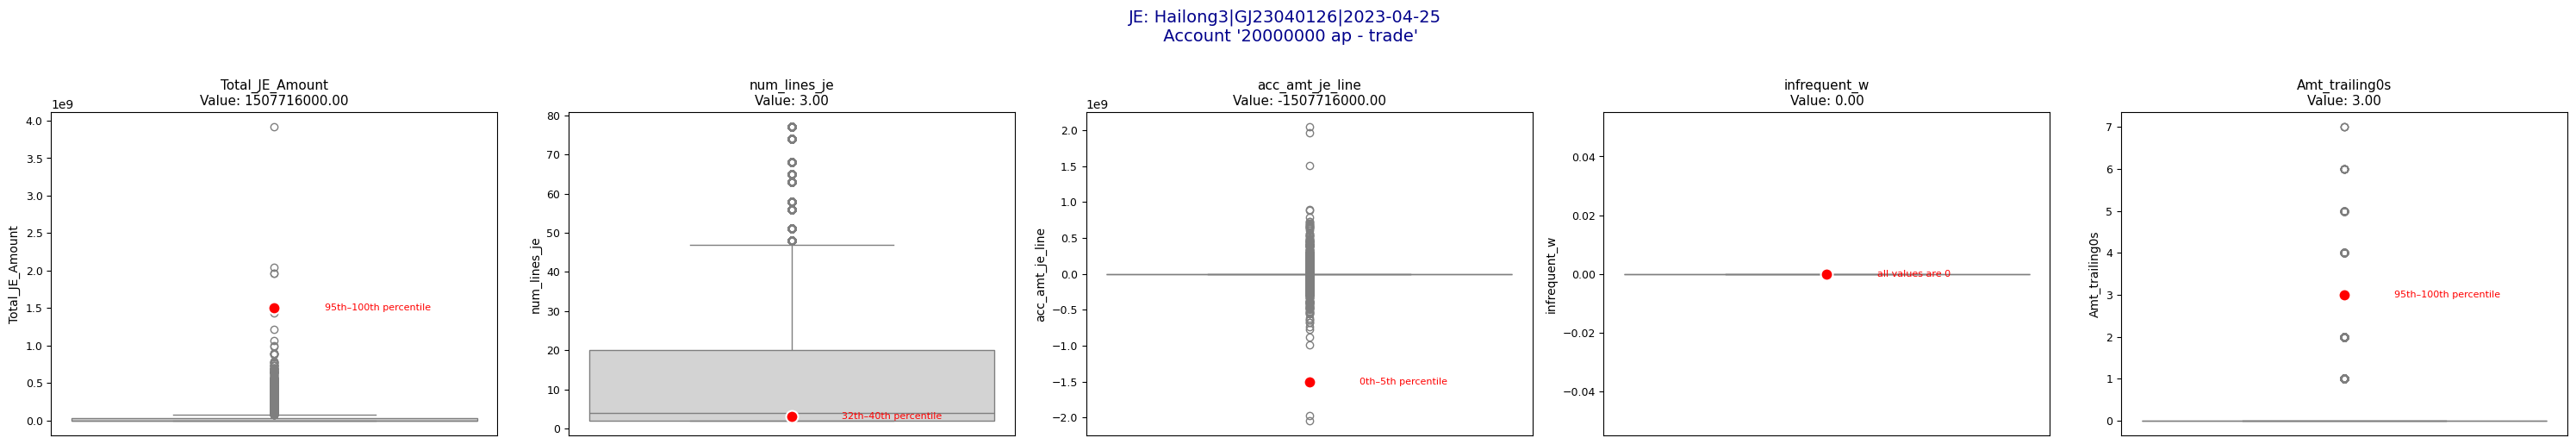

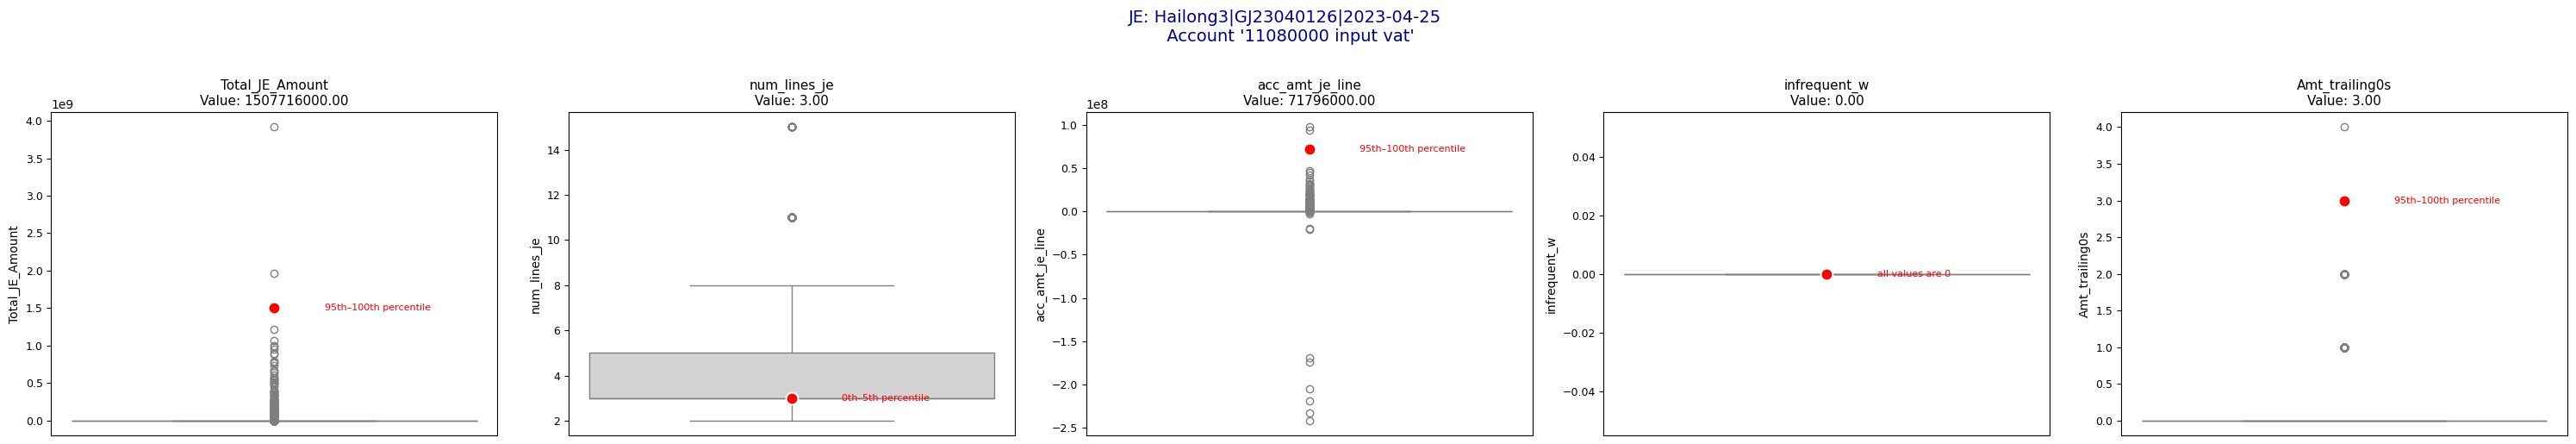

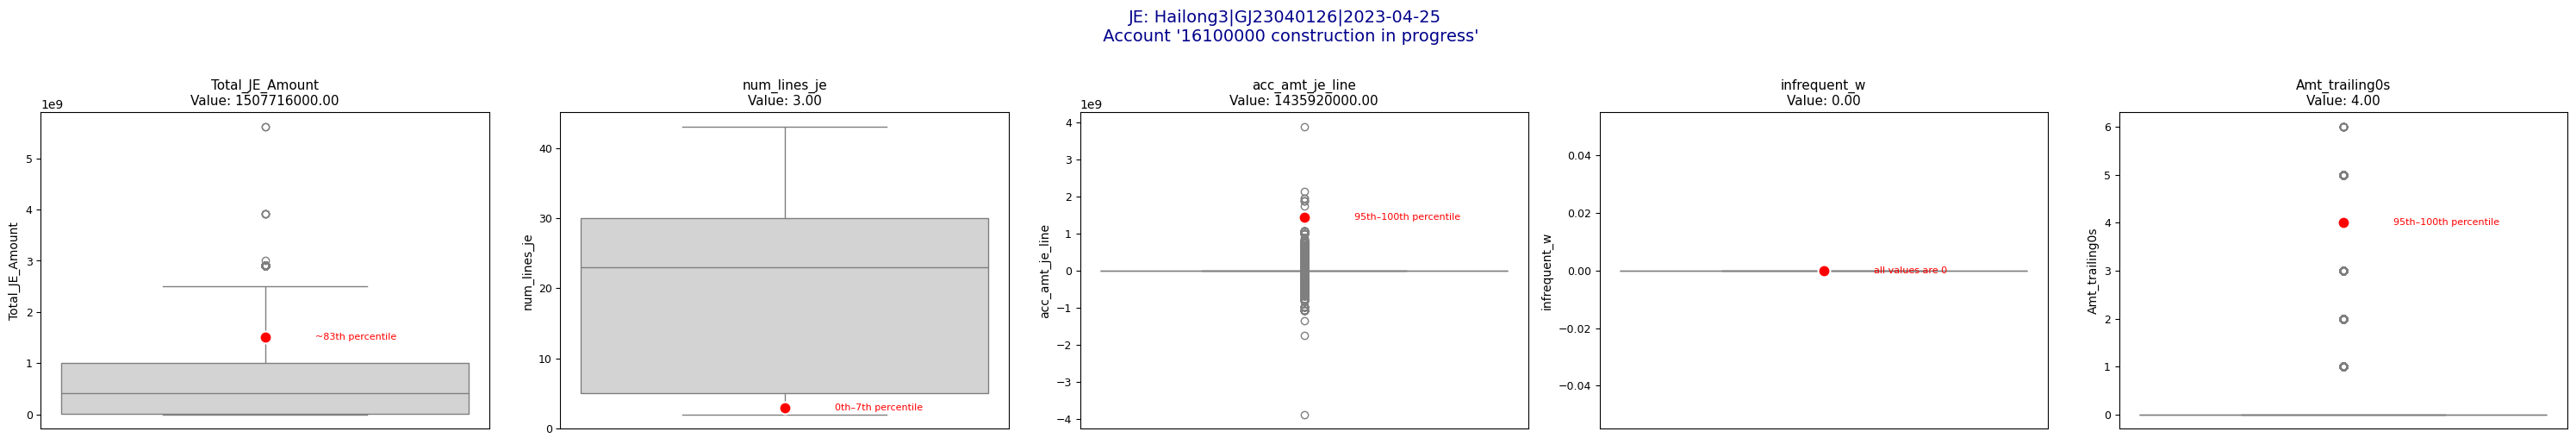

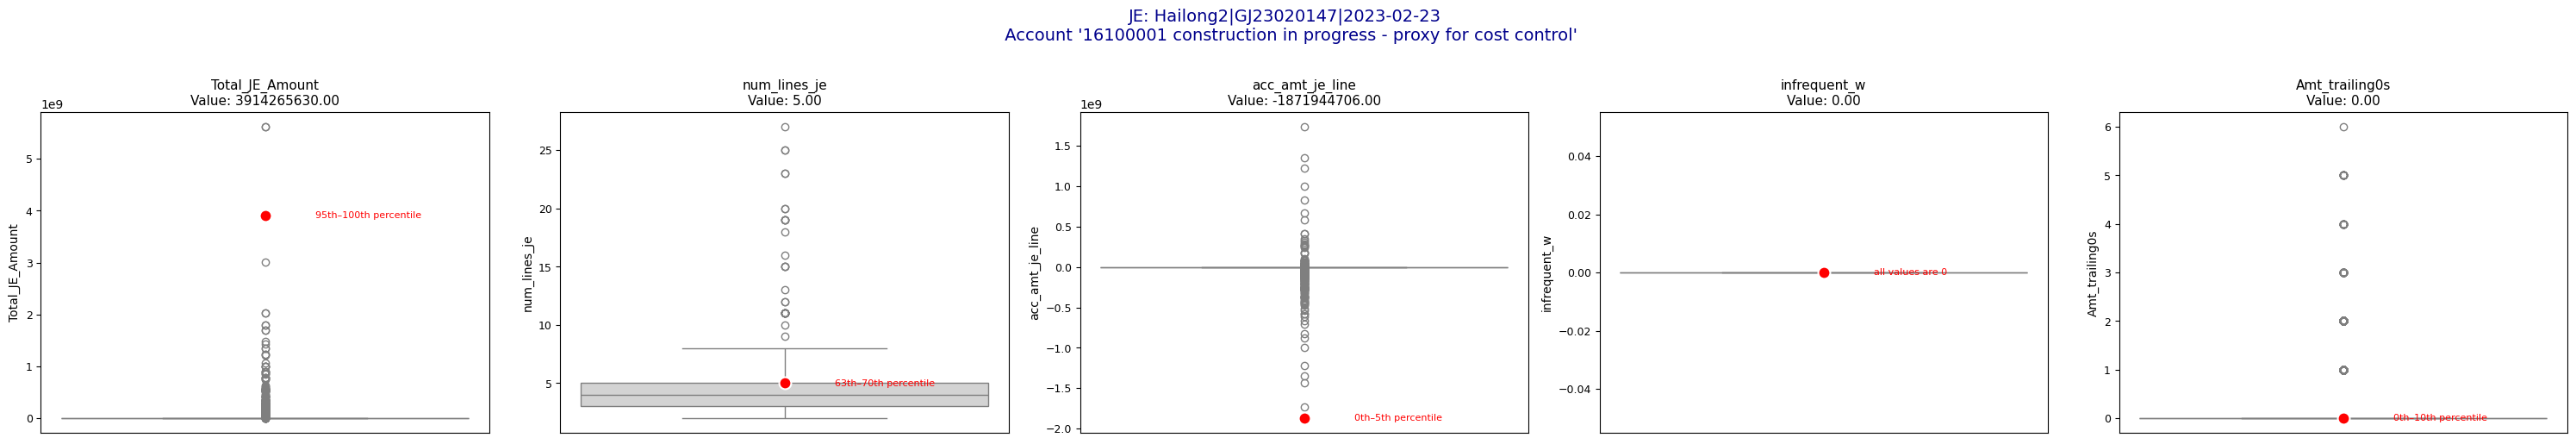

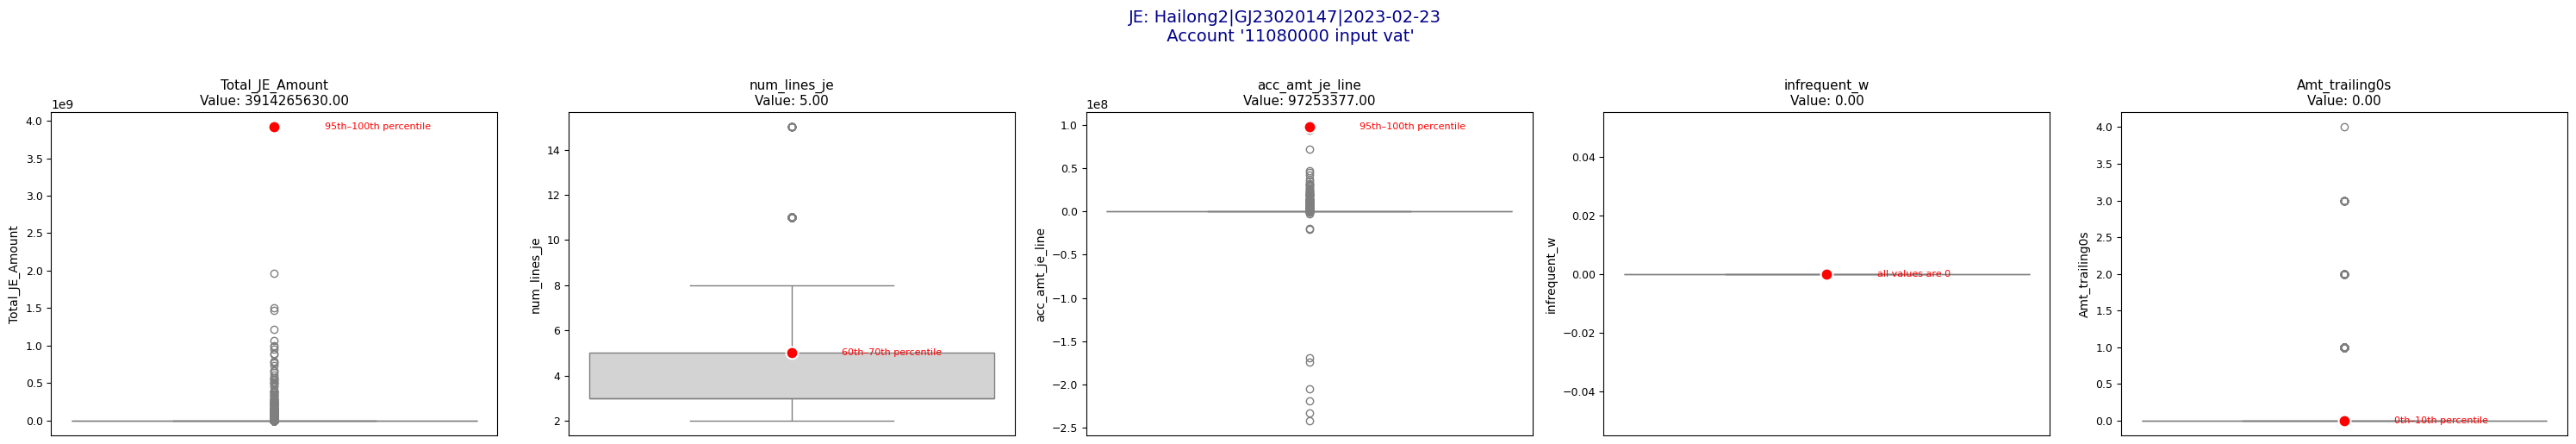

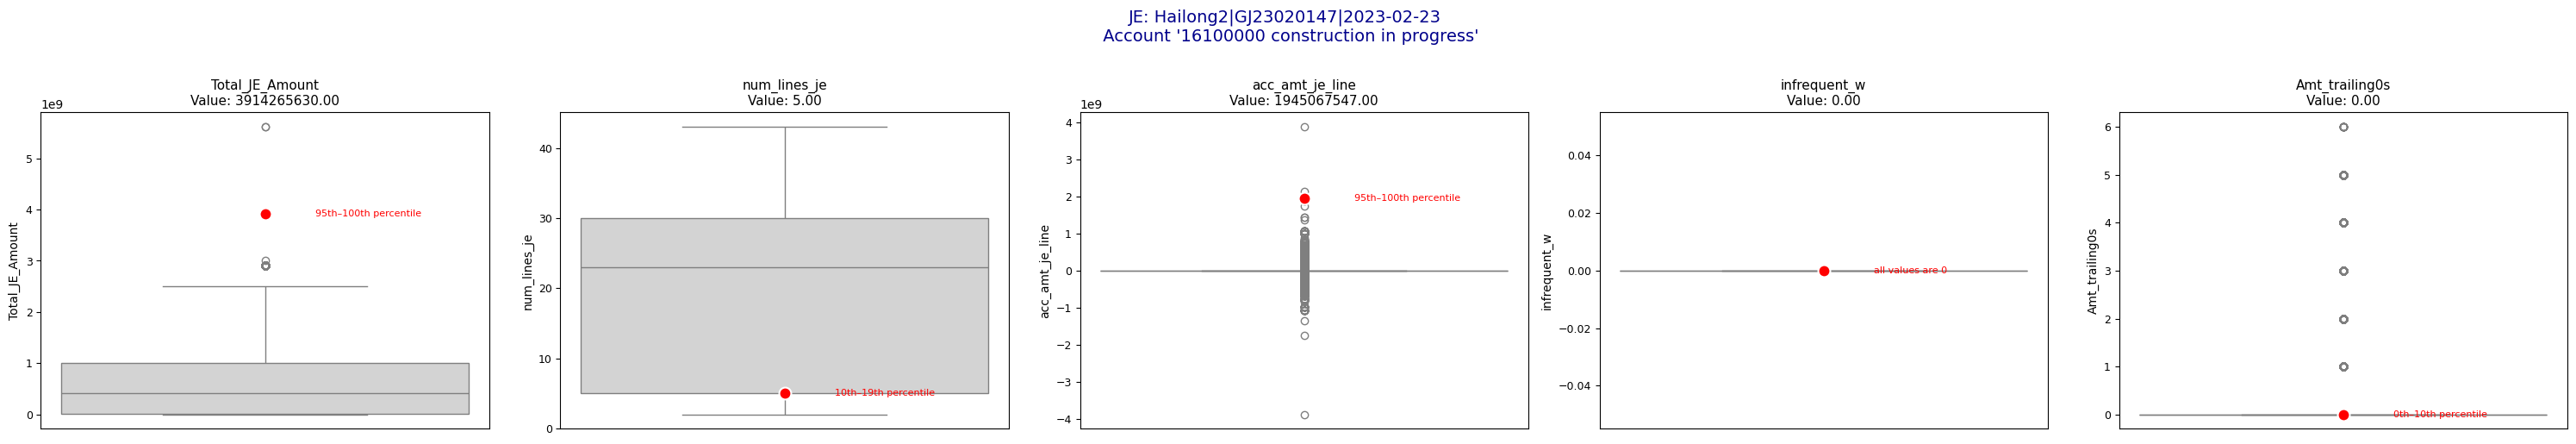

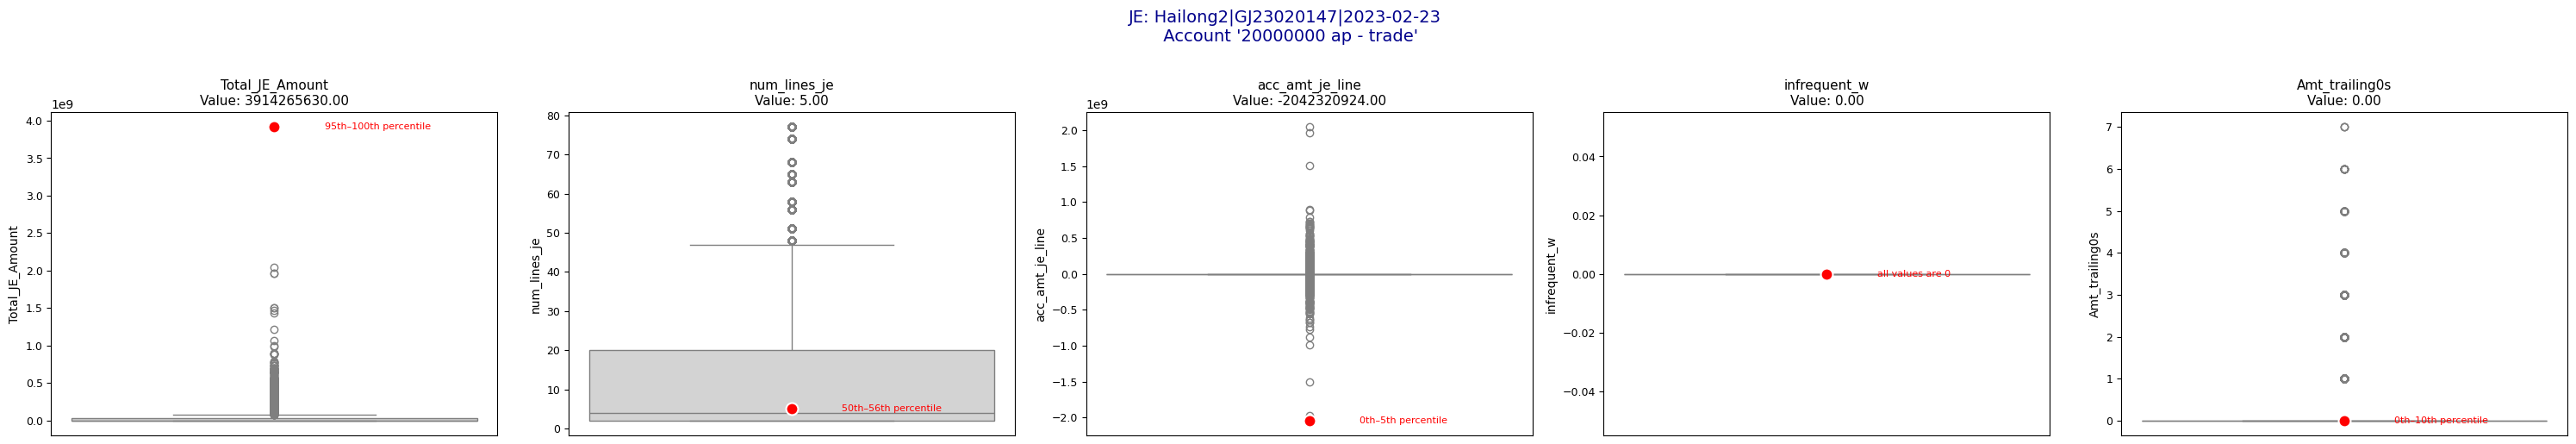

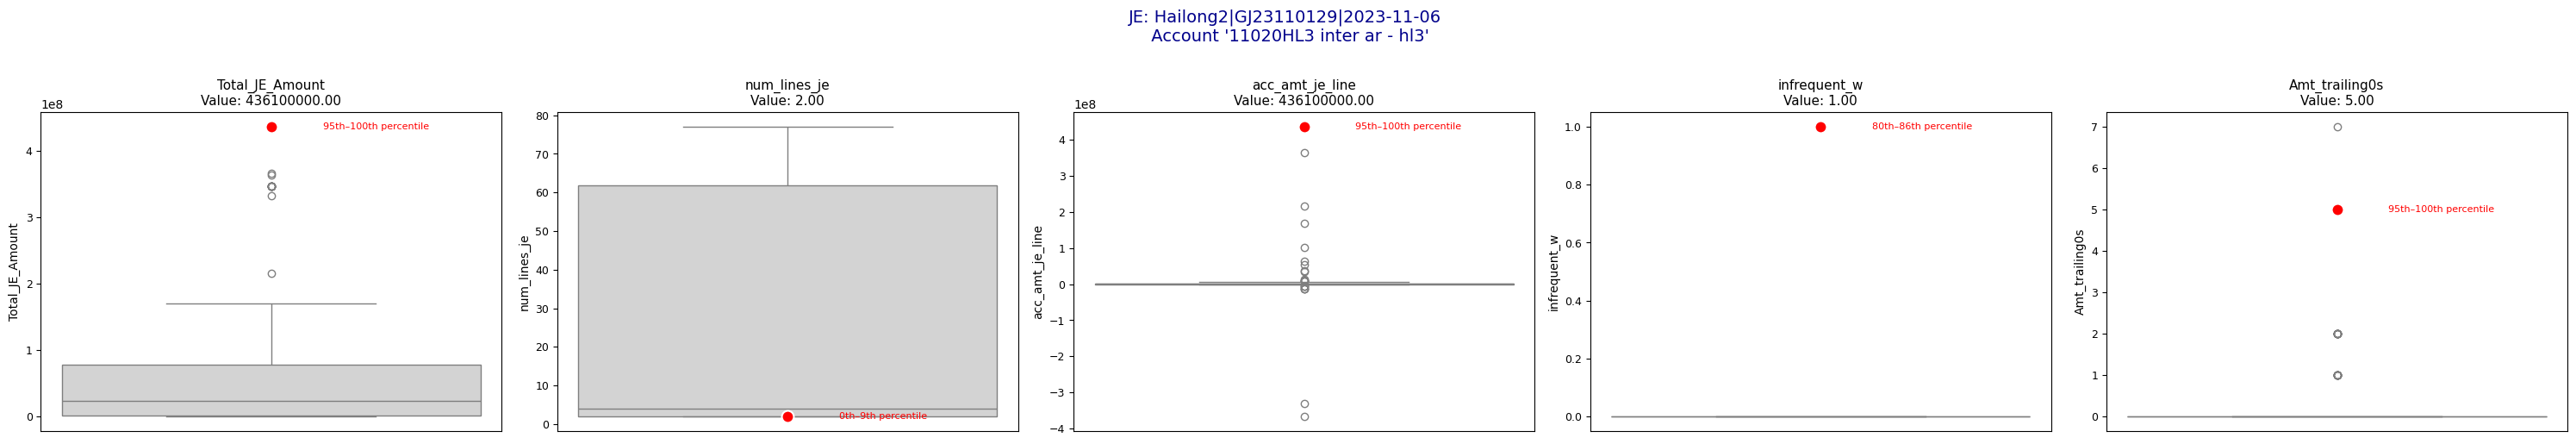

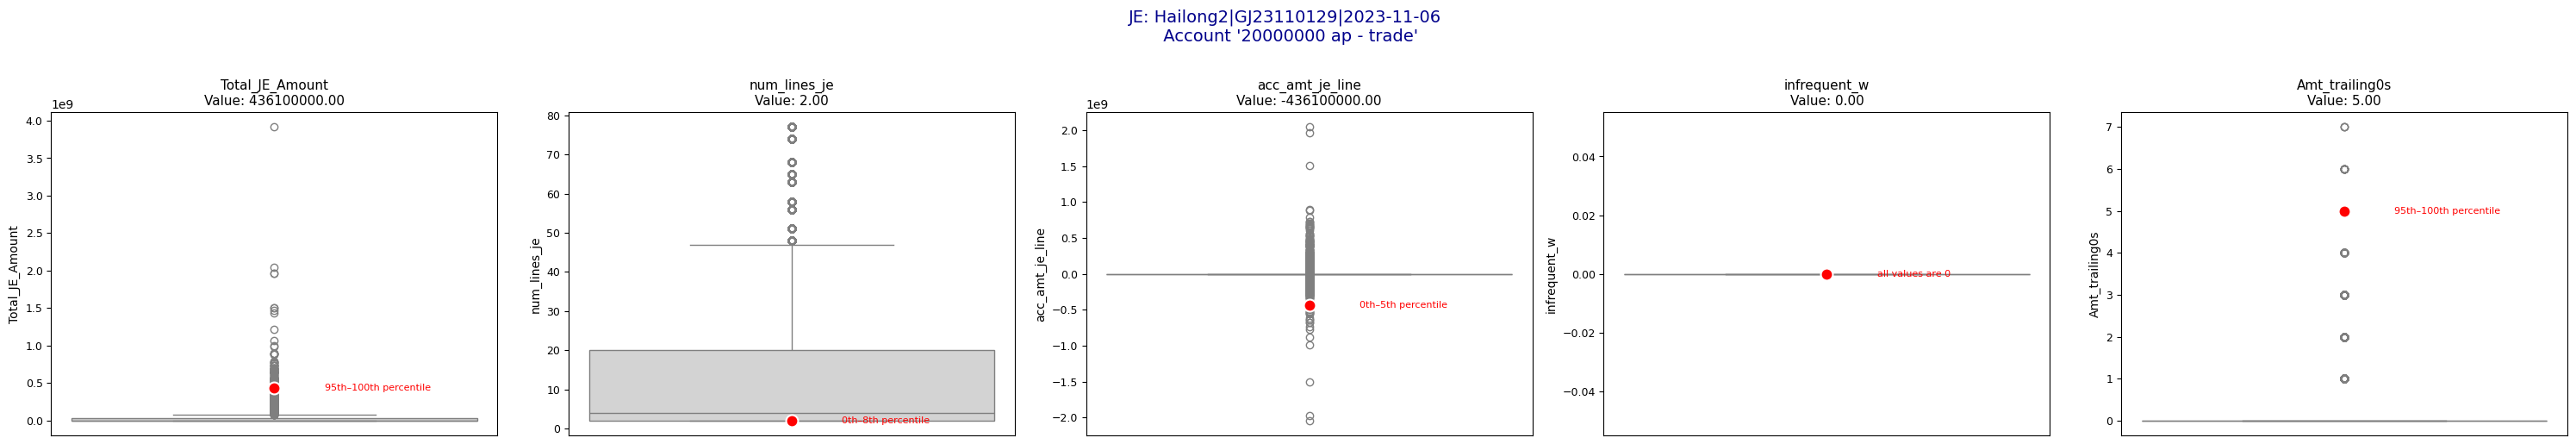

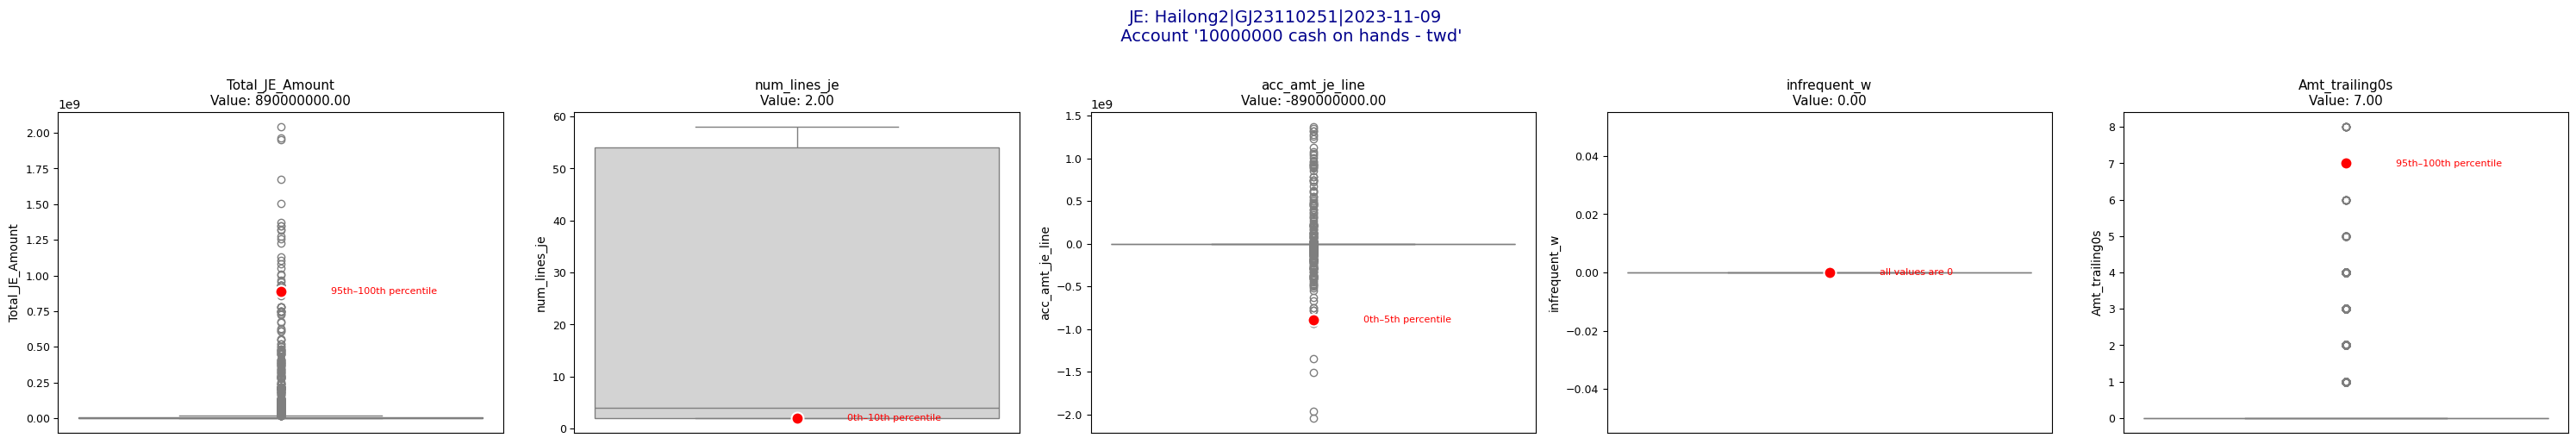

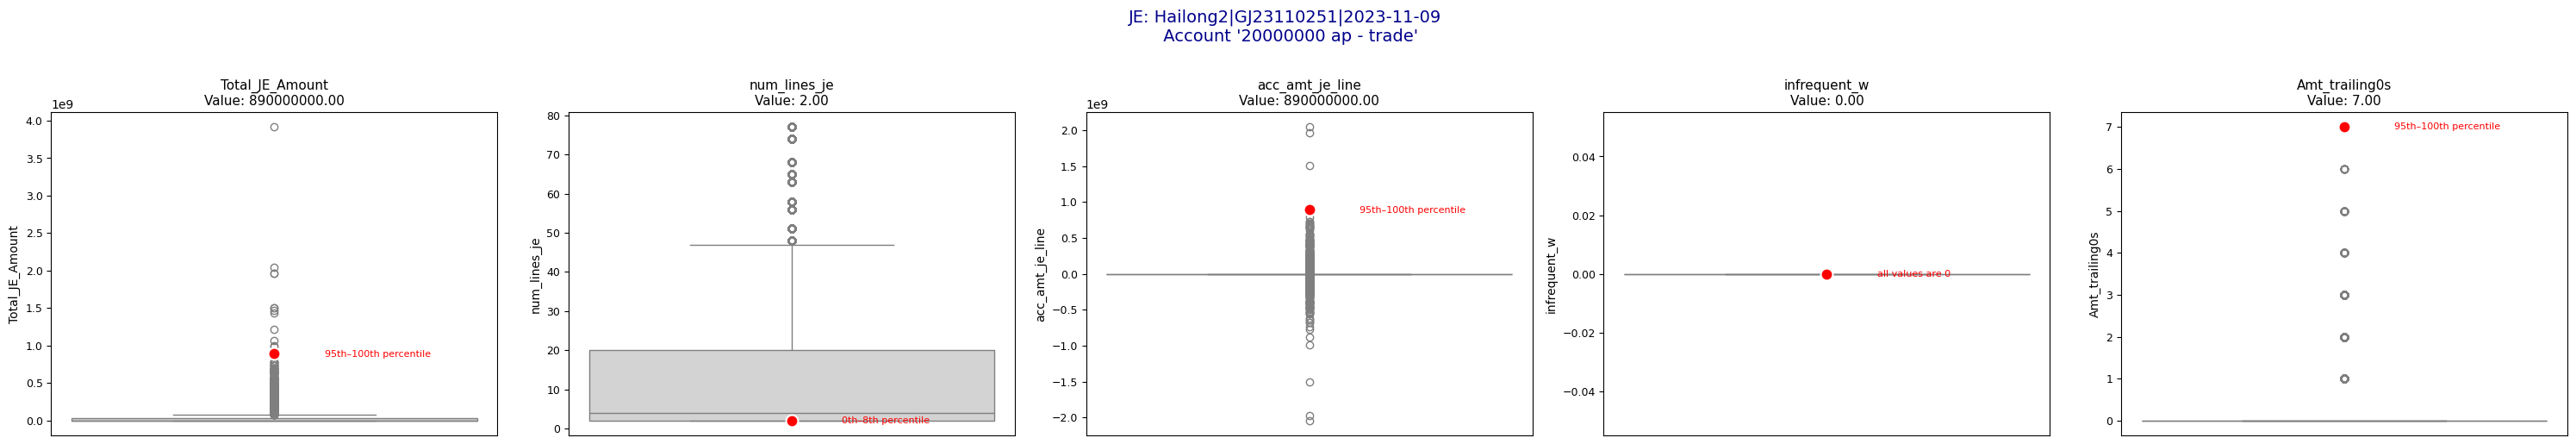

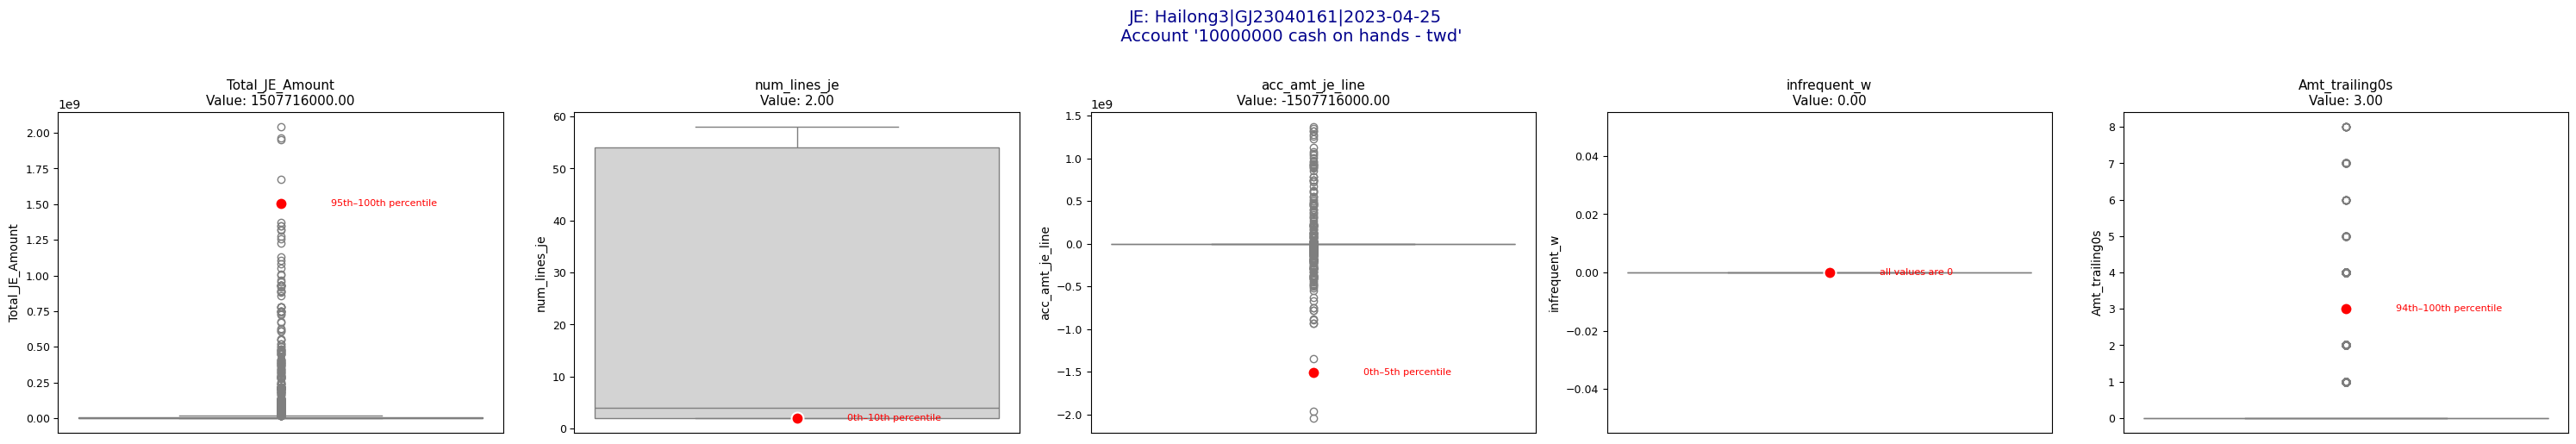

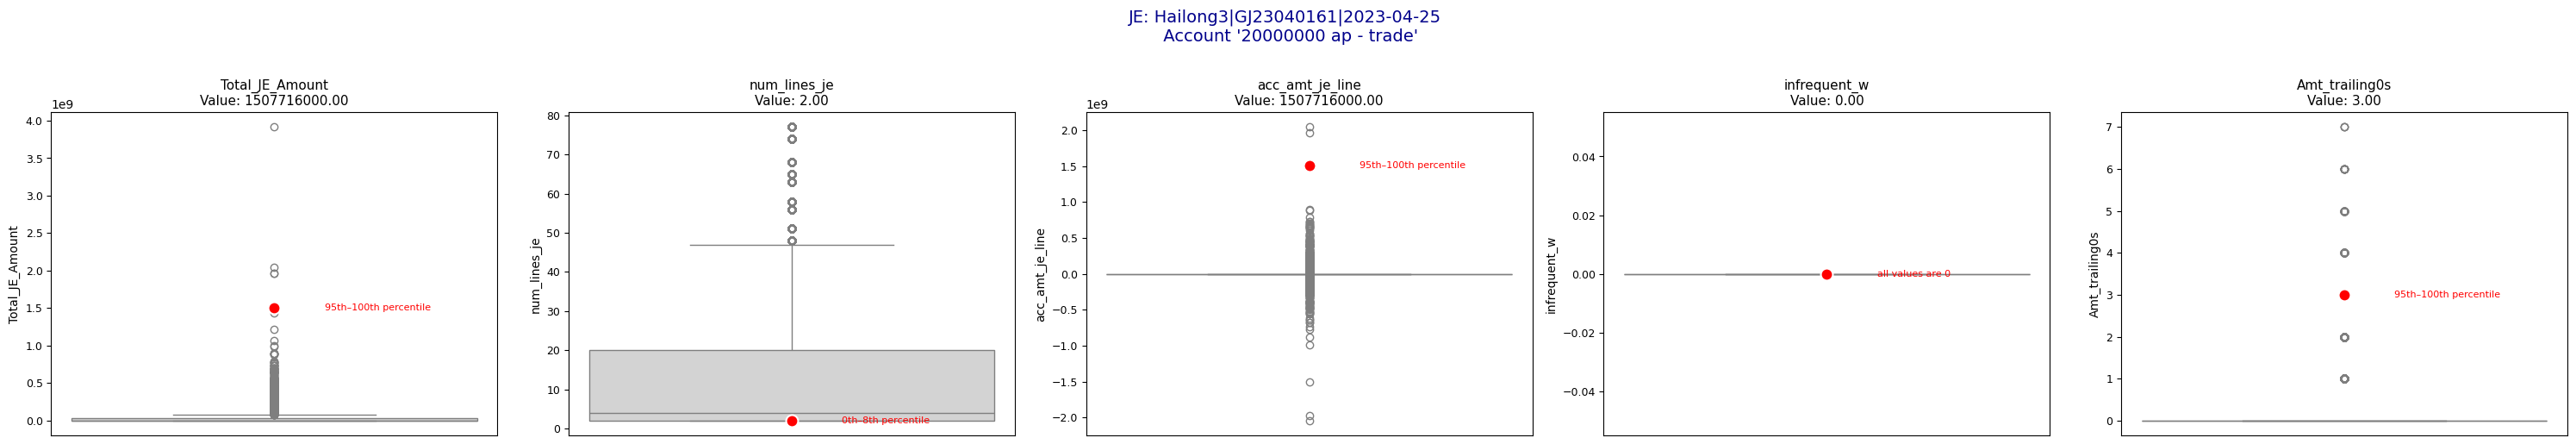

    rank                       JE_Doc_ID           Account_ID  \
0      1  Hailong3|GJ23040126|2023-04-25  20000000 ap - trade   
1      1  Hailong3|GJ23040126|2023-04-25  20000000 ap - trade   
2      1  Hailong3|GJ23040126|2023-04-25  20000000 ap - trade   
3      1  Hailong3|GJ23040126|2023-04-25  20000000 ap - trade   
4      1  Hailong3|GJ23040126|2023-04-25  20000000 ap - trade   
..   ...                             ...                  ...   
60     5  Hailong3|GJ23040161|2023-04-25  20000000 ap - trade   
61     5  Hailong3|GJ23040161|2023-04-25  20000000 ap - trade   
62     5  Hailong3|GJ23040161|2023-04-25  20000000 ap - trade   
63     5  Hailong3|GJ23040161|2023-04-25  20000000 ap - trade   
64     5  Hailong3|GJ23040161|2023-04-25  20000000 ap - trade   

            feature    line_value  n_in_account_history  \
0   Total_JE_Amount  1.507716e+09                 20396   
1      num_lines_je  3.000000e+00                 20396   
2   acc_amt_je_line -1.507716e+09         

In [ ]:
summary = plot_top_anomalous_jes_by_account_per_je(
    result_df=anomalies_e,
    features=features,
    je_id_col='JE_Doc_ID',
    account_col='Account_ID',
    anomaly_score_col='anomaly_score',
    n_top_jes=5
)

print(summary)